#Imports et installations

### Installation de Keras et importations :

In [2]:
# https://keras.io/
!pip install -q keras
import keras

!pip install -q tqdm
from tqdm import tqdm

import random as rd
import numpy as np
import matplotlib.pyplot as plt
import os
!pip install -q panda
import pandas as pd

Using TensorFlow backend.


In [3]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

import timeit

Found GPU at: /device:GPU:0


In [0]:
from keras.models import load_model
from keras import optimizers

### Importation des bases de données de MNIST :

In [11]:
from __future__ import print_function
import numpy as np
np.random.seed(1337)  # for reproducibility

from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D, Input
from keras.utils import np_utils
from keras import backend as K

# input image dimensions
img_rows, img_cols = 28, 28
nb_classes =10

##### Chargement des donnees

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print (K.image_dim_ordering())

if K.image_dim_ordering() == 'th':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)


x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = np_utils.to_categorical(y_train, nb_classes)
y_test = np_utils.to_categorical(y_test, nb_classes)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

11493376/11490434 [==============================] - 0s 0us/step
tf
x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)
60000 train samples
10000 test samples
y_train shape: (60000, 10)
y_test shape: (10000, 10)


#Classifieur 99%

### Définition des fonctions utilisées (pour créer un modèle, l'entraîner et afficher les courbes) :

In [0]:
def plot_learning_curves(history):
    #print history.history.keys()
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('plot_learning_curves.png')
    
def create_model(dr,lr):
  Inputs = Input(shape=(28,28,1))
  x = keras.layers.Conv2D(32,(3,3))(Inputs)
  x = Activation('relu') (x)
  x = MaxPooling2D(pool_size=(2,2))(x)
  x = keras.layers.Conv2D(32,(3,3))(x)
  x = Activation('relu') (x)
  x = MaxPooling2D(pool_size=(2,2))(x)
  x = Dropout(dr) (x)
  x = Flatten() (x)
  x = Dense(100) (x)
  x = Activation('relu') (x)
  x = Dropout(dr) (x)
  x = Dense(10) (x)
  O = Activation('softmax') (x)
  model = Model(input = Inputs, output = O)
  sgd = optimizers.SGD(lr=0.048)

  model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

  model.summary()
  return(model)

def train_model(model,nb_epoch):
  H = model.fit(x_train, y_train, nb_epoch=nb_epoch, batch_size=16, verbose =1, validation_split=0.33)
  score = model.evaluate(x_test, y_test, batch_size=16)
  
  plot_learning_curves(H)
  return(score)

### Récupération des meilleurs paramètres et sauvegarde du modèle (grid search) :

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("ac...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 11, 11, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
__________

40199/40199 [==============================] - 25s 629us/step - loss: 0.4747 - acc: 0.8476 - val_loss: 0.0973 - val_acc: 0.9716
Epoch 2/10
33376/40199 [=======================>......] - ETA: 3s - loss: 0.1980 - acc: 0.9400

40199/40199 [==============================] - 24s 600us/step - loss: 0.1932 - acc: 0.9412 - val_loss: 0.0860 - val_acc: 0.9747
Epoch 3/10
40199/40199 [==============================] - 24s 597us/step - loss: 0.1543 - acc: 0.9533 - val_loss: 0.0635 - val_acc: 0.9807
Epoch 4/10
 2512/40199 [>.............................] - ETA: 19s - loss: 0.1265 - acc: 0.9590

40199/40199 [==============================] - 24s 593us/step - loss: 0.1295 - acc: 0.9609 - val_loss: 0.0509 - val_acc: 0.9838
Epoch 5/10
32736/40199 [=======================>......] - ETA: 3s - loss: 0.1197 - acc: 0.9640

40199/40199 [==============================] - 24s 605us/step - loss: 0.1190 - acc: 0.9638 - val_loss: 0.0476 - val_acc: 0.9850
Epoch 6/10
40199/40199 [==============================] - 24s 608us/step - loss: 0.1090 - acc: 0.9668 - val_loss: 0.0461 - val_acc: 0.9858
Epoch 7/10
 1776/40199 [>.............................] - ETA: 21s - loss: 0.0954 - acc: 0.9718

40199/40199 [==============================] - 25s 612us/step - loss: 0.1016 - acc: 0.9697 - val_loss: 0.0416 - val_acc: 0.9865
Epoch 8/10
31456/40199 [======================>.......] - ETA: 4s - loss: 0.0973 - acc: 0.9708

40199/40199 [==============================] - 24s 609us/step - loss: 0.0971 - acc: 0.9711 - val_loss: 0.0513 - val_acc: 0.9841
Epoch 9/10
40199/40199 [==============================] - 24s 597us/step - loss: 0.0943 - acc: 0.9712 - val_loss: 0.0417 - val_acc: 0.9875
Epoch 10/10
 2112/40199 [>.............................] - ETA: 20s - loss: 0.0831 - acc: 0.9763

10000/10000 [==============================] - 2s 195us/step


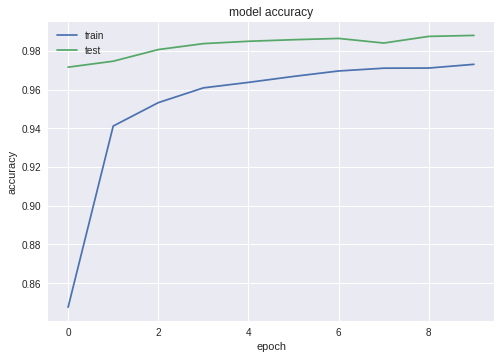

10000/10000 [==============================] - 2s 193us/step
[0.03061827876266743, 0.9893]


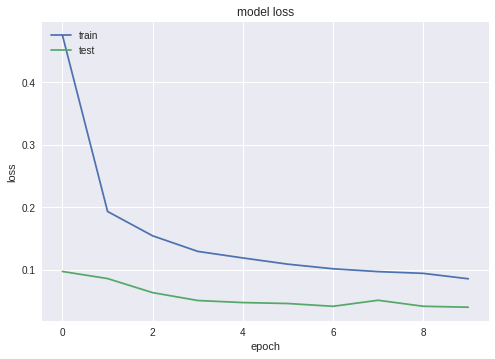

In [8]:
#print("Meilleurs résultats : loss = "+str(M[0])+", accuracy = "+str(M[1]))
#print("Obtenus pour : dropout = "+str(M[2])+", learning rate = "+str(M[3]))

#0.45  0.04

model=create_model(0.48,0.007)
score_train=train_model(model,10)
score = model.evaluate(x_test, y_test, batch_size=16)
print(score)
model.save('my_model.h5')
#model = load_model('my_model.h5')

#Seuils

### Application de seuils :

In [0]:
def test_model(model,seuil,x_test,y_test):
  predictions=model.predict(x_test)
  indices=[]
  for i in range(len(x_test)):
    #print(max(predictions[i]))
    if max(predictions[i])>seuil:
      indices.append(i)
  new_x_test=[]
  new_y_test=[]
  if len(indices)==0:
    print("Toutes les images sont rejetées...")
    return([len(x_test),1])
  for indice in indices:
    new_x_test.append(x_test[indice])
    new_y_test.append(y_test[indice])
  new_x_test=np.array(new_x_test)
  new_y_test=np.array(new_y_test)
  new_score=model.evaluate(new_x_test,new_y_test,batch_size=16)
  nb_total=len(x_test)
  nb_conservees=len(new_x_test)
  nb_rejetees=nb_total-nb_conservees
  rapport_conservees=nb_conservees/nb_total
  print("Seuil : ",seuil)
  print("Nombre d'images conservées : "+str(nb_conservees)+"/"+str(nb_total)+" = "+str(100*rapport_conservees)+"%")
  print("Nombre d'images rejetées : "+str(nb_rejetees))
  print("Score avec les images conservées : ",new_score)
  return([nb_rejetees,new_score[1]])

### Test avec ce modèle :

In [10]:
test_model(model,1,x_test,y_test)

Toutes les images sont rejetées...


[10000, 1]

1/19
9985/9985 [==============================] - 2s 163us/step
Nombre d'images conservées : 9985/10000 = 99.85000000000001%
Nombre d'images rejetées : 15
Score avec les images conservées :  [0.028999760838647692, 0.9901852779168753]
2/19
9729/9729 [==============================] - 2s 190us/step
Nombre d'images conservées : 9729/10000 = 97.28999999999999%
Nombre d'images rejetées : 271
Score avec les images conservées :  [0.013018310787749288, 0.9973275773460787]
3/19
9729/9729 [==============================] - 2s 190us/step
Nombre d'images conservées : 9729/10000 = 97.28999999999999%
Nombre d'images rejetées : 271
Score avec les images conservées :  [0.013018310787749288, 0.9973275773460787]
4/19
9711/9711 [==============================] - 2s 196us/step
Nombre d'images conservées : 9711/10000 = 97.11%
Nombre d'images rejetées : 289
Score avec les images conservées :  [0.011972117678262456, 0.9976315518484193]
5/19
9679/9679 [==============================] - 2s 189us/step


Nombre d'images conservées : 9679/10000 = 96.78999999999999%
Nombre d'images rejetées : 321
Score avec les images conservées :  [0.010918017370597366, 0.9979336708337638]
6/19
9631/9631 [==============================] - 2s 189us/step
Nombre d'images conservées : 9631/10000 = 96.31%
Nombre d'images rejetées : 369
Score avec les images conservées :  [0.009500499901884608, 0.9982348665766795]
7/19
9574/9574 [==============================] - 2s 190us/step
Nombre d'images conservées : 9574/10000 = 95.74000000000001%
Nombre d'images rejetées : 426
Score avec les images conservées :  [0.00734494002758603, 0.9988510549404638]
8/19
9475/9475 [==============================] - 2s 193us/step
Nombre d'images conservées : 9475/10000 = 94.75%
Nombre d'images rejetées : 525
Score avec les images conservées :  [0.005759667331399442, 0.999155672823219]
9/19
9244/9244 [==============================] - 2s 188us/step
Nombre d'images conservées : 9244/10000 = 92.44%
Nombre d'images rejetées : 756
Score 

9244/9244 [==============================] - 2s 198us/step
Nombre d'images conservées : 9244/10000 = 92.44%
Nombre d'images rejetées : 756
Score avec les images conservées :  [0.0038456566720273524, 0.999459108610991]
11/19
9212/9212 [==============================] - 2s 196us/step
Nombre d'images conservées : 9212/10000 = 92.12%
Nombre d'images rejetées : 788
Score avec les images conservées :  [0.0038260378186987863, 0.9994572297003907]
12/19
9183/9183 [==============================] - 2s 187us/step
Nombre d'images conservées : 9183/10000 = 91.83%
Nombre d'images rejetées : 817
Score avec les images conservées :  [0.0038117141734660275, 0.9994555156267015]
13/19
9132/9132 [==============================] - 2s 190us/step
Nombre d'images conservées : 9132/10000 = 91.32000000000001%
Nombre d'images rejetées : 868
Score avec les images conservées :  [0.003792315883721197, 0.9994524748138415]
14/19
9081/9081 [==============================] - 2s 193us/step
Nombre d'images conservées : 90

9014/9014 [==============================] - 2s 194us/step
Nombre d'images conservées : 9014/10000 = 90.14%
Nombre d'images rejetées : 986
Score avec les images conservées :  [0.0032115394543056446, 0.9995562458398047]
16/19
8919/8919 [==============================] - 2s 194us/step
Nombre d'images conservées : 8919/10000 = 89.19%
Nombre d'images rejetées : 1081
Score avec les images conservées :  [0.0025451448937956578, 0.9996636394214599]
17/19
8743/8743 [==============================] - 2s 189us/step
Nombre d'images conservées : 8743/10000 = 87.42999999999999%
Nombre d'images rejetées : 1257
Score avec les images conservées :  [0.0010998398426133866, 0.9998856227839414]
18/19
8455/8455 [==============================] - 2s 189us/step
Nombre d'images conservées : 8455/10000 = 84.55%
Nombre d'images rejetées : 1545
Score avec les images conservées :  [7.438203267047851e-05, 1.0]
19/19
Toutes les images sont rejetées...


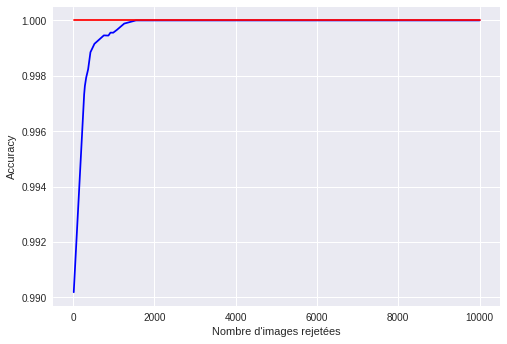

In [12]:
seuils=np.concatenate((np.linspace(0.5,0.9,2),np.linspace(0.9,0.99,7),np.linspace(0.99,1,10)))
x=[]
y=[]
lim=4000
current=0
i=0
while i<len(seuils) and current<lim:
  print(str(i+1)+"/"+str(len(seuils)))
  point=test_model(model,seuils[i],x_test,y_test)
  x.append(point[0])
  y.append(point[1])
  i+=1
  current=point[0]

  
o=np.ones(len(x))
fig = plt.figure()
plt.plot(x,y,'b')
plt.plot(x,o,'r')
plt.xlabel("Nombre d'images rejetées")
plt.ylabel("Accuracy")
fig.savefig('classifier_seuil.png')
plt.show()

### Test avec le modèle à 96% :

In [69]:
from google.colab import files
uploaded = files.upload()

In [26]:
model_95=load_model('10_classifier')

In [27]:
print(model_95.evaluate(x_test,y_test))

10000/10000 [==============================] - 2s 201us/step
[2.2412123321533204, 0.9618]


1/16
10000/10000 [==============================] - 3s 322us/step
Nombre d'images conservées : 10000/10000 = 100.0%
Nombre d'images rejetées : 0
Score avec les images conservées :  [2.2412123332977294, 0.9618]
[0, 0.9618]
2/16
10000/10000 [==============================] - 3s 325us/step
Nombre d'images conservées : 10000/10000 = 100.0%
Nombre d'images rejetées : 0
Score avec les images conservées :  [2.2412123332977294, 0.9618]
[0, 0.9618]
3/16
10000/10000 [==============================] - 3s 325us/step
Nombre d'images conservées : 10000/10000 = 100.0%
Nombre d'images rejetées : 0
Score avec les images conservées :  [2.2412123332977294, 0.9618]
[0, 0.9618]
4/16
 9728/10000 [============================>.] - ETA: 0s

10000/10000 [==============================] - 3s 329us/step
Nombre d'images conservées : 10000/10000 = 100.0%
Nombre d'images rejetées : 0
Score avec les images conservées :  [2.2412123332977294, 0.9618]
[0, 0.9618]
5/16
10000/10000 [==============================] - 3s 331us/step
Nombre d'images conservées : 10000/10000 = 100.0%
Nombre d'images rejetées : 0
Score avec les images conservées :  [2.2412123332977294, 0.9618]
[0, 0.9618]
6/16
10000/10000 [==============================] - 3s 328us/step
Nombre d'images conservées : 10000/10000 = 100.0%
Nombre d'images rejetées : 0
Score avec les images conservées :  [2.2412123332977294, 0.9618]
[0, 0.9618]
7/16
10000/10000 [==============================] - 3s 328us/step
Nombre d'images conservées : 10000/10000 = 100.0%
Nombre d'images rejetées : 0
Score avec les images conservées :  [2.2412123332977294, 0.9618]
[0, 0.9618]
8/16


9948/9948 [==============================] - 3s 328us/step
Nombre d'images conservées : 9948/10000 = 99.48%
Nombre d'images rejetées : 52
Score avec les images conservées :  [2.2409428912662435, 0.9644149577804584]
[52, 0.9644149577804584]
9/16
9240/9240 [==============================] - 3s 327us/step
Nombre d'images conservées : 9240/10000 = 92.4%
Nombre d'images rejetées : 760
Score avec les images conservées :  [2.2380717277526854, 0.9821428571428571]
[760, 0.9821428571428571]
10/16
7408/7408 [==============================] - 2s 332us/step
Nombre d'images conservées : 7408/10000 = 74.08%
Nombre d'images rejetées : 2592
Score avec les images conservées :  [2.232185565627162, 0.9947354211663066]
[2592, 0.9947354211663066]
11/16
4442/4442 [==============================] - 1s 332us/step
Nombre d'images conservées : 4442/10000 = 44.42%
Nombre d'images rejetées : 5558
Score avec les images conservées :  [2.2229893714229783, 0.9986492570914003]
[5558, 0.9986492570914003]
12/16
1753/1753

514/514 [==============================] - 0s 335us/step
Nombre d'images conservées : 514/10000 = 5.140000000000001%
Nombre d'images rejetées : 9486
Score avec les images conservées :  [2.1969747571165925, 1.0]
[9486, 1.0]
15/16
Toutes les images sont rejetées...
[10000, 1]
16/16
Toutes les images sont rejetées...
[10000, 1]


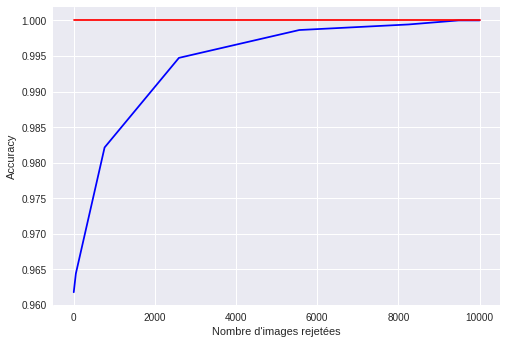

In [32]:
seuils=np.concatenate((np.linspace(0,0.1,6),np.linspace(0.1,0.11,7),np.linspace(0.11,1,3)))
x=[]
y=[]
lim=10000
current=0
i=0
while i<len(seuils) and current<lim:
  print(str(i+1)+"/"+str(len(seuils)))
  point=test_model(model_95,seuils[i],x_test,y_test)
  x.append(point[0])
  y.append(point[1])
  print(point)
  i+=1
  current=point[0]


o=np.ones(len(x))
fig95 = plt.figure()
plt.plot(x,y,'b')
plt.plot(x,o,'r')
plt.xlabel("Nombre d'images rejetées")
plt.ylabel("Accuracy")
fig95.savefig('classifier_seuil_95.png')
plt.show()

#Entropie de Shannon

###Définition de l'entropie de Shannon :

In [0]:
def entropie(array):
  H=0
  for j in range(len(array)):
    H+=-1*array[j]*np.log2(array[j])
  return(H)

def test_model_entropie(model,seuil,x_test,y_test):
    predictions=model.predict(x_test)
    indices=[]
    for i in range(len(x_test)):
      #print(entropie(predictions[i]))
      if entropie(predictions[i])<seuil:
        indices.append(i)
    new_x_test=[]
    new_y_test=[]
    if len(indices)==0:
      print("Toutes les images sont rejetées...")
      return([len(x_test),1])
    for indice in indices:
      new_x_test.append(x_test[indice])
      new_y_test.append(y_test[indice])
    new_x_test=np.array(new_x_test)
    new_y_test=np.array(new_y_test)
    new_score=model.evaluate(new_x_test,new_y_test,batch_size=16)
    nb_total=len(x_test)
    nb_conservees=len(new_x_test)
    nb_rejetees=nb_total-nb_conservees
    rapport_conservees=nb_conservees/nb_total
    print("Seuil : ",seuil)
    print("Nombre d'images conservées : "+str(nb_conservees)+"/"+str(nb_total)+" = "+str(100*rapport_conservees)+"%")
    print("Nombre d'images rejetées : "+str(nb_rejetees))
    print("Score avec les images conservées : ",new_score)
    return([nb_rejetees,new_score[1]])

### Test avec ce modèle

1/33
6676/6676 [==============================] - 1s 175us/step
Nombre d'images conservées : 6676/10000 = 66.75999999999999%
Nombre d'images rejetées : 3324
Score avec les images conservées :  [7.6284073072429104e-06, 1.0]
2/33
7905/7905 [==============================] - 2s 194us/step
Nombre d'images conservées : 7905/10000 = 79.05%
Nombre d'images rejetées : 2095
Score avec les images conservées :  [3.373528455509732e-05, 1.0]
3/33
8309/8309 [==============================] - 2s 188us/step
Nombre d'images conservées : 8309/10000 = 83.09%
Nombre d'images rejetées : 1691
Score avec les images conservées :  [5.924834267253494e-05, 1.0]
4/33
8309/8309 [==============================] - 2s 194us/step
Nombre d'images conservées : 8309/10000 = 83.09%
Nombre d'images rejetées : 1691
Score avec les images conservées :  [5.924834267253494e-05, 1.0]
5/33
8492/8492 [==============================] - 2s 188us/step
Nombre d'images conservées : 8492/10000 = 84.92%
Nombre d'images rejetées : 1508
Sc

8640/8640 [==============================] - 2s 190us/step
Nombre d'images conservées : 8640/10000 = 86.4%
Nombre d'images rejetées : 1360
Score avec les images conservées :  [0.0010905075625184206, 0.9998842592592593]
7/33
8723/8723 [==============================] - 2s 188us/step
Nombre d'images conservées : 8723/10000 = 87.22999999999999%
Nombre d'images rejetées : 1277
Score avec les images conservées :  [0.001097686557053031, 0.9998853605410982]
8/33
8807/8807 [==============================] - 2s 190us/step
Nombre d'images conservées : 8807/10000 = 88.07000000000001%
Nombre d'images rejetées : 1193
Score avec les images conservées :  [0.0011094828396642034, 0.9998864539570796]
9/33
8873/8873 [==============================] - 2s 198us/step
Nombre d'images conservées : 8873/10000 = 88.73%
Nombre d'images rejetées : 1127
Score avec les images conservées :  [0.0011220266335114672, 0.9998872985461512]
10/33
8927/8927 [==============================] - 2s 199us/step
Nombre d'images co

8970/8970 [==============================] - 2s 197us/step
Nombre d'images conservées : 8970/10000 = 89.7%
Nombre d'images rejetées : 1030
Score avec les images conservées :  [0.0032070243390227597, 0.9995540691192865]
12/33
9010/9010 [==============================] - 2s 202us/step
Nombre d'images conservées : 9010/10000 = 90.10000000000001%
Nombre d'images rejetées : 990
Score avec les images conservées :  [0.003211461464566385, 0.9995560488346282]
13/33
9051/9051 [==============================] - 2s 197us/step
Nombre d'images conservées : 9051/10000 = 90.51%
Nombre d'images rejetées : 949
Score avec les images conservées :  [0.003218176388032722, 0.9995580598828858]
14/33
9051/9051 [==============================] - 2s 193us/step
Nombre d'images conservées : 9051/10000 = 90.51%
Nombre d'images rejetées : 949
Score avec les images conservées :  [0.003218176388032722, 0.9995580598828858]
15/33
9084/9084 [==============================] - 2s 198us/step
Nombre d'images conservées : 908

9123/9123 [==============================] - 2s 189us/step
Nombre d'images conservées : 9123/10000 = 91.23%
Nombre d'images rejetées : 877
Score avec les images conservées :  [0.0037900742357808805, 0.9994519346706128]
17/33
9157/9157 [==============================] - 2s 200us/step
Nombre d'images conservées : 9157/10000 = 91.57%
Nombre d'images rejetées : 843
Score avec les images conservées :  [0.003801583796951397, 0.999453969640712]
18/33
9183/9183 [==============================] - 2s 200us/step
Nombre d'images conservées : 9183/10000 = 91.83%
Nombre d'images rejetées : 817
Score avec les images conservées :  [0.0038118578474407487, 0.9994555156267015]
19/33
9200/9200 [==============================] - 2s 190us/step
Nombre d'images conservées : 9200/10000 = 92.0%
Nombre d'images rejetées : 800
Score avec les images conservées :  [0.0038203150239318664, 0.9994565217391305]
20/33
9221/9221 [==============================] - 2s 191us/step
Nombre d'images conservées : 9221/10000 = 92

9251/9251 [==============================] - 2s 187us/step
Nombre d'images conservées : 9251/10000 = 92.51%
Nombre d'images rejetées : 749
Score avec les images conservées :  [0.0038514124449877543, 0.9994595178899578]
22/33
9265/9265 [==============================] - 2s 197us/step
Nombre d'images conservées : 9265/10000 = 92.65%
Nombre d'images rejetées : 735
Score avec les images conservées :  [0.0038615047202509656, 0.9994603345925526]
23/33
9284/9284 [==============================] - 2s 193us/step
Nombre d'images conservées : 9284/10000 = 92.84%
Nombre d'images rejetées : 716
Score avec les images conservées :  [0.003876661417046208, 0.9994614390348987]
24/33
9284/9284 [==============================] - 2s 191us/step
Nombre d'images conservées : 9284/10000 = 92.84%
Nombre d'images rejetées : 716
Score avec les images conservées :  [0.003876661417046208, 0.9994614390348987]
25/33
9491/9491 [==============================] - 2s 193us/step
Nombre d'images conservées : 9491/10000 = 9

9594/9594 [==============================] - 2s 198us/step
Nombre d'images conservées : 9594/10000 = 95.94%
Nombre d'images rejetées : 406
Score avec les images conservées :  [0.008083458252334832, 0.9986449864498645]
27/33
9664/9664 [==============================] - 2s 189us/step
Nombre d'images conservées : 9664/10000 = 96.64%
Nombre d'images rejetées : 336
Score avec les images conservées :  [0.009983169869582788, 0.9981374172185431]
28/33
9712/9712 [==============================] - 2s 199us/step
Nombre d'images conservées : 9712/10000 = 97.11999999999999%
Nombre d'images rejetées : 288
Score avec les images conservées :  [0.011934888653581822, 0.9976317957166392]
29/33
9753/9753 [==============================] - 2s 196us/step
Nombre d'images conservées : 9753/10000 = 97.53%
Nombre d'images rejetées : 247
Score avec les images conservées :  [0.013141686198207535, 0.997334153593766]
30/33
9785/9785 [==============================] - 2s 192us/step
Nombre d'images conservées : 9785/

9806/9806 [==============================] - 2s 194us/step
Nombre d'images conservées : 9806/10000 = 98.06%
Nombre d'images rejetées : 194
Score avec les images conservées :  [0.015377564467144203, 0.9966347134407506]
32/33
9837/9837 [==============================] - 2s 191us/step
Nombre d'images conservées : 9837/10000 = 98.37%
Nombre d'images rejetées : 163
Score avec les images conservées :  [0.017922331839058413, 0.9955270915929654]
33/33
9876/9876 [==============================] - 2s 196us/step
Nombre d'images conservées : 9876/10000 = 98.76%
Nombre d'images rejetées : 124
Score avec les images conservées :  [0.020170695963250464, 0.9943296881328473]
1/29
9985/9985 [==============================] - 2s 193us/step
Nombre d'images conservées : 9985/10000 = 99.85000000000001%
Nombre d'images rejetées : 15
Score avec les images conservées :  [0.028999760838647692, 0.9901852779168753]
2/29
9729/9729 [==============================] - 2s 192us/step


Nombre d'images conservées : 9729/10000 = 97.28999999999999%
Nombre d'images rejetées : 271
Score avec les images conservées :  [0.013018310787749288, 0.9973275773460787]
3/29
9729/9729 [==============================] - 2s 193us/step
Nombre d'images conservées : 9729/10000 = 97.28999999999999%
Nombre d'images rejetées : 271
Score avec les images conservées :  [0.013018310787749288, 0.9973275773460787]
4/29
9711/9711 [==============================] - 2s 189us/step
Nombre d'images conservées : 9711/10000 = 97.11%
Nombre d'images rejetées : 289
Score avec les images conservées :  [0.011972117678262456, 0.9976315518484193]
5/29
9679/9679 [==============================] - 2s 186us/step
Nombre d'images conservées : 9679/10000 = 96.78999999999999%
Nombre d'images rejetées : 321
Score avec les images conservées :  [0.010918017370597366, 0.9979336708337638]
6/29
9631/9631 [==============================] - 2s 192us/step
Nombre d'images conservées : 9631/10000 = 96.31%
Nombre d'images rejetée

9574/9574 [==============================] - 2s 192us/step
Nombre d'images conservées : 9574/10000 = 95.74000000000001%
Nombre d'images rejetées : 426
Score avec les images conservées :  [0.00734494002758603, 0.9988510549404638]
8/29
9475/9475 [==============================] - 2s 188us/step
Nombre d'images conservées : 9475/10000 = 94.75%
Nombre d'images rejetées : 525
Score avec les images conservées :  [0.005759667331399442, 0.999155672823219]
9/29
9244/9244 [==============================] - 2s 191us/step
Nombre d'images conservées : 9244/10000 = 92.44%
Nombre d'images rejetées : 756
Score avec les images conservées :  [0.0038456566720273524, 0.999459108610991]
10/29
9244/9244 [==============================] - 2s 183us/step
Nombre d'images conservées : 9244/10000 = 92.44%
Nombre d'images rejetées : 756
Score avec les images conservées :  [0.0038456566720273524, 0.999459108610991]
11/29
9229/9229 [==============================] - 2s 190us/step
Nombre d'images conservées : 9229/100

9212/9212 [==============================] - 2s 188us/step
Nombre d'images conservées : 9212/10000 = 92.12%
Nombre d'images rejetées : 788
Score avec les images conservées :  [0.0038260378186987863, 0.9994572297003907]
13/29
9199/9199 [==============================] - 2s 188us/step
Nombre d'images conservées : 9199/10000 = 91.99000000000001%
Nombre d'images rejetées : 801
Score avec les images conservées :  [0.0038191609866473227, 0.9994564626589847]
14/29
9183/9183 [==============================] - 2s 195us/step
Nombre d'images conservées : 9183/10000 = 91.83%
Nombre d'images rejetées : 817
Score avec les images conservées :  [0.0038117141734660275, 0.9994555156267015]
15/29
9155/9155 [==============================] - 2s 191us/step
Nombre d'images conservées : 9155/10000 = 91.55%
Nombre d'images rejetées : 845
Score avec les images conservées :  [0.003800304139483628, 0.9994538503549972]
16/29
9132/9132 [==============================] - 2s 187us/step
Nombre d'images conservées : 9

9112/9112 [==============================] - 2s 190us/step
Nombre d'images conservées : 9112/10000 = 91.12%
Nombre d'images rejetées : 888
Score avec les images conservées :  [0.003233339368664927, 0.9995610184372257]
18/29
9081/9081 [==============================] - 2s 193us/step
Nombre d'images conservées : 9081/10000 = 90.81%
Nombre d'images rejetées : 919
Score avec les images conservées :  [0.003224588464978405, 0.9995595198766656]
19/29
9046/9046 [==============================] - 2s 188us/step
Nombre d'images conservées : 9046/10000 = 90.46%
Nombre d'images rejetées : 954
Score avec les images conservées :  [0.0032167252510082477, 0.999557815609109]
20/29
9046/9046 [==============================] - 2s 189us/step
Nombre d'images conservées : 9046/10000 = 90.46%
Nombre d'images rejetées : 954
Score avec les images conservées :  [0.0032167252510082477, 0.999557815609109]
21/29
9014/9014 [==============================] - 2s 187us/step
Nombre d'images conservées : 9014/10000 = 90.

8962/8962 [==============================] - 2s 190us/step
Nombre d'images conservées : 8962/10000 = 89.62%
Nombre d'images rejetées : 1038
Score avec les images conservées :  [0.003206042766404683, 0.9995536710555679]
23/29
8919/8919 [==============================] - 2s 191us/step
Nombre d'images conservées : 8919/10000 = 89.19%
Nombre d'images rejetées : 1081
Score avec les images conservées :  [0.0025451448937956578, 0.9996636394214599]
24/29
8842/8842 [==============================] - 2s 183us/step
Nombre d'images conservées : 8842/10000 = 88.42%
Nombre d'images rejetées : 1158
Score avec les images conservées :  [0.0011155112343925635, 0.9998869034155169]
25/29
8743/8743 [==============================] - 2s 187us/step
Nombre d'images conservées : 8743/10000 = 87.42999999999999%
Nombre d'images rejetées : 1257
Score avec les images conservées :  [0.0010998398426133866, 0.9998856227839414]
26/29
8651/8651 [==============================] - 2s 191us/step
Nombre d'images conservées

8455/8455 [==============================] - 2s 192us/step
Nombre d'images conservées : 8455/10000 = 84.55%
Nombre d'images rejetées : 1545
Score avec les images conservées :  [7.438203267047851e-05, 1.0]
28/29
8129/8129 [==============================] - 2s 185us/step
Nombre d'images conservées : 8129/10000 = 81.28999999999999%
Nombre d'images rejetées : 1871
Score avec les images conservées :  [4.574564892663665e-05, 1.0]
29/29
Toutes les images sont rejetées...


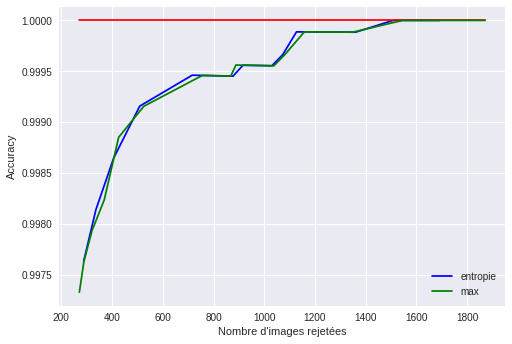

'\n#Le modèle à 96%\n#entropie\nseuils=np.concatenate((np.linspace(3.3,3.32,4),np.linspace(3.32,3.323,20)))\nx=[]\ny=[]\nlim=10001\ncurrent=0\ni=0\nwhile i<len(seuils) and current<lim:\n  print(str(i+1)+"/"+str(len(seuils)))\n  point=test_model_entropie(model_95,seuils[i],x_test,y_test)\n  x.append(point[0])\n  y.append(point[1])\n  i+=1\n  current=point[0]\n\n  \no=np.ones(len(x))\nplt.plot(x,y,\'b\',label="entropie")\nplt.plot(x,o,\'r\')\n\n#max\nseuils=np.concatenate((np.linspace(0,0.1,6),np.linspace(0.1,0.11,10),np.linspace(0.11,1,2)))\nx=[]\ny=[]\nlim=10000\ncurrent=0\ni=0\nwhile i<len(seuils) and current<lim:\n  print(str(i+1)+"/"+str(len(seuils)))\n  point=test_model(model_95,seuils[i],x_test,y_test)\n  x.append(point[0])\n  y.append(point[1])\n  print(point)\n  i+=1\n  current=point[0]\n\n\nplt.plot(x,y,\'g\',label="max")\nplt.xlabel("Nombre d\'images rejetées")\nplt.ylabel("Accuracy")\nplt.legend()\nplt.show()\n'

In [21]:
#Ce modèle
#entropie
seuils=np.concatenate((np.linspace(0.001,0.01,3),np.linspace(0.01,0.05,10),np.linspace(0.05,0.1,10),np.linspace(0.1,1,10)))
x=[]
y=[]
lim=10001
current=0
i=0
while i<len(seuils) and current<lim:
  print(str(i+1)+"/"+str(len(seuils)))
  point=test_model_entropie(model,seuils[i],x_test,y_test)
  x.append(point[0])
  y.append(point[1])
  i+=1
  current=point[0]

X=[]
Y=[]
for p in range(len(x)):
  if x[p]<2000 and x[p]>250:
    X.append(x[p])
    Y.append(y[p])
plt.plot(X,Y,'b',label="entropie")


#max
seuils=np.concatenate((np.linspace(0.5,0.9,2),np.linspace(0.9,0.99,7),np.linspace(0.99,0.995,10),np.linspace(0.995,1,10)))
x=[]
y=[]
lim=10001
current=0
i=0
while i<len(seuils) :# and current<lim:
  print(str(i+1)+"/"+str(len(seuils)))
  point=test_model(model,seuils[i],x_test,y_test)
  x.append(point[0])
  y.append(point[1])
  #print(point)
  i+=1
  current=point[0]

  
X=[]
Y=[]
for p in range(len(x)):
  if x[p]<2000 and x[p]>250:
    X.append(x[p])
    Y.append(y[p])
    
o=np.ones(len(X))
plt.plot(X,o,'r')
plt.plot(X,Y,'g',label="max")
plt.xlabel("Nombre d'images rejetées")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


###Test avec le modèle à 96%

In [0]:
def test_seuil_entropie_95(seuils_p,seuils_e):

  #Le modèle à 96%
 

  #max
  xs=[]
  ys=[]
  lim=10000
  current=0
  i=0
  seuils=seuils_p
  while i<len(seuils) and current<lim:
    print(str(i+1)+"/"+str(len(seuils)))
    point=test_model(model_95,seuils[i],X_test,y_test)
    xs.append(point[0])
    ys.append(point[1])
    print(point)
    i+=1
    current=point[0]

   #entropie
  xe=[]
  ye=[]
  lim=10001
  current=0
  i=0
  seuils=seuils_e
  while i<len(seuils) and current<lim:
    print(str(i+1)+"/"+str(len(seuils)))
    point=test_model_entropie(model_95,seuils[i],X_test,y_test)
    xe.append(point[0])
    ye.append(point[1])
    i+=1
    current=point[0]
  
  return(xs,ys,xe,ye)




In [0]:
xs,ys,xe,ye=test_seuil_entropie_95()
plt.plot(xe,ye,'b',label="entropie")
o=np.ones(len(xe))
plt.plot(xe,o,'r')
plt.plot(xs,ys,'g',label="max")
plt.xlabel("Nombre d'images rejetées")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [60]:
print(test_model_entropie(model_95,3,X_test,y_test))

0.004505966804844352
0.07295831855826773
0.03285633208481459
0.013285950037019774
0.02210888245906292
0.015410119429975609
0.2230295836006242
0.34043577241813333
0.9849749554250549
0.17779921650650515
0.014916307078195393
0.11666646665629721
0.030023393963240018
0.014560502134126024
0.019966766002186498
0.3197934050934314
0.0832174921515964
0.008944035691497333
1.9223441278866789
0.006113769384742026
0.22797602072206163
0.03359796267357094
0.2146472861822941
0.009014004899131197
0.06971355821053034
0.0010495367241955232
0.06688858496368827
0.01045116347033865
0.007297663951429525
0.13889490957546483
0.029508419248195618
0.20410190267198197
0.025713258317368246
1.021765802204302
0.04130822160211156
0.002809258757496155
0.05525440706678399
0.0352344503262527
0.16339658135704901
0.04435771313060873
0.09654709681712705
0.042183501173166014
0.042602402582691414
0.12351045036755674
0.3733201686553455
0.04129633505316541
0.8117892633829925
0.0260172709808643
0.037630799949155816
0.01040235646

0.029036682169873394
0.47783768678067
0.6028667848714379
0.0005993563977428343
0.11814986196386655
0.8790173742576686
0.015324037709055032
0.07311002226316048
0.015839686814941398
0.24294388042549783
0.035340215986991774
0.30576928662790326
0.21888248043963307
0.16926711897923416
0.8785567747242722
0.172430185840795
0.00949582225937788
0.017312789228325874
0.5153747485737714
0.42082560978155603
0.020556459820607848
0.06680635130440613
0.1910612752091072
0.020968176169466446
0.4868058946200315
1.0800749299125436
0.048549343926563716
1.3819391443882503
0.008713662939371893
1.9386799678355773
0.010315481652922792
0.03362686290510253
0.1917049943126949
0.03915971403044165
0.07945204151990652
0.4761234637106133
1.3580947109087802
0.12157974869343033
0.045968132328035295
0.2707785121537767
0.07817342781015649
0.004901677704978935
0.012831199741073232
0.03206742719009098
0.9184039548270235
0.08433543688235398
0.21044146004085634
0.0056255953898461265
0.02664339262807048
0.062387060993291873
0


0.18229053365245995
0.6041326831932947
0.4680430282747196
0.1277016498285548
0.022886945134477296
0.03231925816453861
0.44679552735872674
0.0007519397780166911
0.016772297187387233
1.4874357118562416
0.2843533573498326
0.03401515759574583
0.11523871113295266
0.8146357775529963
0.009136265379598581
0.17532975705782247
0.0011526469265830009
0.20464432419257578
0.01783780902690535
0.9003336175570182
0.009461245852826858
0.02084159635824008
0.006606831058344599
0.008775801121422218
0.17337280923664797
0.002837199803103961
0.033472766474628254
0.011884872782907265
0.009727647503205771
0.516331826796602
1.1167619225589025
0.40178350067388924
0.056046137577934044
0.01575797438524986
0.02584334607836522
0.7831463069722379
0.10662273936382129
0.26903458656857276
0.011261064819261686
0.1614615475518227
0.0774598949877342
0.0803603213897297
0.06892635510455959
0.08662225664937417
0.023937247307755816
0.05425721409454141
0.023814007508976078
0.9935953341399675
0.3773804203482689
0.009483782813080

0.03503225069010999
0.009937795371043555
0.10352452344375496
0.01136156921737631
0.09789361942196612
0.035295917526576556
0.001283208206920781
0.024096984165280298
0.0005236289786503395
0.1380647551019509
0.6260666353326678
0.02938596338473258
0.026832861605276148
0.6886160927177396
0.0027530894587403185
2.5615150221447047
0.00985823572090995
0.021802065608579536
0.39233174257100345
0.05974845505184754
0.1264738243397938
0.15019722522331058
0.004942895778047884
0.03790939834684855
0.003747082983470459
0.00043035619119341793
0.054329556813364925
0.011289719552783956
0.007540999867230273
0.025627369163972857
0.11868784149247212
0.00961760627032686
0.18085294920107095
0.001059534616757624
1.0096235892065137
0.00958312782601541
0.04890463607904876
0.1853531339484899
0.012872971117307034
0.0998023993848275
1.8692984574754155
0.030199460195086087
0.1131396981120076
0.0038319266409263157
0.03686103879032706
0.014626002798298421
0.03212957394500039
0.05132013346153314
0.0454662968485694
0.0116


0.23626190731314586
0.021225481021172804
0.23210148705473468
0.016209640122972775
0.4827442955566875
0.033821796129485535
0.04902667235572848
0.011276742702214954
0.019205675382165104
0.6279645214246712
0.02721492339932246
0.0052034916079204165
0.12176321674027352
0.03210310696422525
0.02842596013087823
0.047200895917214394
0.3829738533094543
0.0075659814497043435
0.013747227477006786
0.01477309336920566
0.0070680079067928486
0.030288732364833974
0.0024834365993538564
0.007293279929092016
0.08449207241429016
0.001086913860482115
0.02783823007069358
0.004162274016314055
0.011259912186183815
0.09956032176043766
0.0827484031217198
0.010205355653707653
0.6482619157416399
0.019977683766422512
0.24350237113506898
1.5180616189109981
0.02592208093459315
0.000724689035413552
0.01414494435435793
0.0013455934460578514
0.018595804275502014
0.01048445328795447
0.017055109245802533
0.0016708078509664567
0.04549032156431229
0.005022543182130279
0.06054448513370453
0.009658970982888218
0.006339202985


0.027975178227716713
0.00040035962333184494
0.0011269671191822313
0.03659589889066364
0.018873078710546318
0.002654323262660939
0.5817432474354747
0.156255651844574
0.004070860629032321
0.01943618080345544
0.003933667351205185
0.010381747855110757
0.009647249555615533
0.09910734951576067
0.001886662260627344
0.011314272986958447
0.017801344348952294
0.00018487574963281772
0.012071338155906181
0.0011503260655059244
0.06005051728448904
0.014915468871064643
0.008909319654307996
0.009975798087771829
0.003932656100923063
0.0015452589298274426
0.028077382263572613
0.5743075571084233
0.026005286648994416
0.0186948612546548
0.0252477098628721
0.0038026803562899738
0.0020805125585332414
0.02174651117945267
0.0016839056240982157
0.0016652186464597922
0.00303550996804926
0.00772007092359236
0.08352634900379716
0.018351554814480295
0.013235236223900985
0.005915354456079198
0.0028438782439793526
0.0006850029155748891
0.0026757951825154237
0.0021195145431603776
0.003302836275011793
0.01963130180937

 5408/10000 [===============>..............] - ETA: 1s

KeyboardInterrupt: ignored

#Avec le rejecteur

##Imports

In [0]:
import os

os.environ["KERAS_BACKEND"] = "tensorflow"

tqdm.monitor_interval = 0

from keras.layers import Input
from keras.models import Model, Sequential
from keras.layers.core import Reshape, Dense, Dropout, Flatten
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import Conv2D, UpSampling2D, MaxPooling2D
from keras.datasets import mnist
from keras.optimizers import Adam, Adagrad
from keras import backend as K
from keras import initializers
from keras.utils import np_utils

from keras.layers import Input
from keras.models import Model, Sequential
from keras.layers.core import Reshape, Dense, Dropout, Flatten
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import Convolution2D, UpSampling2D
from keras.layers.normalization import BatchNormalization
from keras.datasets import mnist
from keras.optimizers import Adam
from keras import backend as K
from keras import initializers

K.set_image_dim_ordering('th')

# Deterministic output.
# Tired of seeing the same results every time? Remove the line below.
np.random.seed(1000)

# The results are a little better when the dimensionality of the random vector is only 10.
# The dimensionality has been left at 100 for consistency with other GAN implementations.
randomDim = 100
K.set_image_dim_ordering('th')

# Deterministic output.
# Tired of seeing the same results every time? Remove the line below.

# The results are a little better when the dimensionality of the random vector is only 10.
# The dimensionality has been left at 100 for consistency with other GAN implementations.
randomDim = 100


In [5]:
# Load MNIST data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

nb_classes = 10
X_train = (X_train.astype(np.float32) - 127.5)/127.5
X_train = X_train[:, np.newaxis, :, :]

Y_train = np_utils.to_categorical(y_train, nb_classes)
#Y_train = Y_train * 0.9

X_test = (X_test.astype(np.float32) - 127.5)/127.5
X_test = X_test[:, np.newaxis, :, :]
Y_test = np_utils.to_categorical(y_test, nb_classes)
#Y_test = Y_test * 0.9

11493376/11490434 [==============================] - 3s 0us/step


##Gan

In [13]:
dossier=[]
resultat=[]

from keras.optimizers import Adagrad

# Optimizer
#adam = Adam(lr=0.0002, beta_1=0.5)

adam = Adagrad(lr=0.001, epsilon=None, decay=0.0)

# Generator
generator = Sequential()
generator.add(Dense(128*7*7, input_dim=randomDim, kernel_initializer=initializers.RandomNormal(stddev=0.02)))
generator.add(LeakyReLU(0.2))
generator.add(Reshape((128, 7, 7)))
generator.add(UpSampling2D(size=(2, 2)))
generator.add(Conv2D(64, kernel_size=(5, 5), padding='same'))
generator.add(LeakyReLU(0.2))
generator.add(UpSampling2D(size=(2, 2)))
generator.add(Conv2D(1, kernel_size=(5, 5), padding='same', activation='tanh'))
generator.compile(loss='binary_crossentropy', optimizer=adam)

print (generator.summary())
from keras.layers import BatchNormalization

# Discriminator
discriminator = Sequential()
discriminator.add(Conv2D(64, kernel_size=(5, 5), strides=(2, 2), padding='same', input_shape=(1, 28, 28), kernel_initializer=initializers.RandomNormal(stddev=0.02)))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dropout(0.3))
discriminator.add(Conv2D(128, kernel_size=(5, 5), strides=(2, 2), padding='same'))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dropout(0.3))
discriminator.add(Flatten())
discriminator.add(Dense(1, activation='sigmoid'))
discriminator.compile(loss='binary_crossentropy', optimizer=adam)

print (discriminator.summary())

# Combined network
discriminator.trainable = False
ganInput = Input(shape=(randomDim,))
x = generator(ganInput)
ganOutput = discriminator(x)
gan = Model(inputs=ganInput, outputs=ganOutput)
gan.compile(loss='binary_crossentropy', optimizer=adam)

gan.summary()

dLosses = []
gLosses = []
cLosses_p =[]
cLosses_r =[]

# Plot the loss from each batch
def plotLoss(epoch):
    plt.figure(figsize=(10, 8))
    plt.plot(dLosses, label='Discriminitive loss')
    plt.plot(gLosses, label='Generative loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.savefig('gan_loss_epoch_%d.png' % epoch)

# Create a wall of generated MNIST images
def plotGeneratedImages(epoch, examples=100, dim=(10, 10), figsize=(10, 10)):
    noise = np.random.normal(0, 1, size=[examples, randomDim])
    generatedImages = generator.predict(noise)
    generatedImages = generatedImages.reshape(examples, 28, 28)
    generatedImages1=generatedImages[:, np.newaxis, :, :]
    result=discriminator.predict(generatedImages1)
    for i in range(examples): 
      dossier.append(generatedImages[i,:,:])
      resultat.append(result[i][0])

   # plt.figure(figsize=figsize)
    #for i in range(generatedImages.shape[0]):
     #   plt.subplot(dim[0], dim[1], i+1)
      #  plt.imshow(generatedImages[i], interpolation='nearest', cmap='gray_r')
       # plt.axis('off')
   # plt.tight_layout()
    #plt.savefig('gan_generated_image_epoch_%d.png' % epoch)


# Save the generator and discriminator networks (and weights) for later use
def saveModels(epoch):
    generator.save('gan_generator_epoch_%d.h5' % epoch)
    discriminator.save('gan_discriminator_epoch_%d.h5' % epoch)

def train(epochs=1, batchSize=128):
    batchCount = X_train.shape[0] / batchSize
    print ('Epochs:', epochs)
    print ('Batch size:', batchSize)
    print ('Batches per epoch:', batchCount)

    for e in range(1, epochs+1):
        print ('-'*15, 'Epoch %d' % e, '-'*15)
        for b in tqdm(range(int(batchCount))):
            # Get a random set of input noise and images
            noise = np.random.normal(0, 1, size=[batchSize, randomDim])
            imageBatch = X_train[np.random.randint(0, X_train.shape[0], size=batchSize)]

            # Generate fake MNIST images
            generatedImages = generator.predict(noise)
            # print np.shape(imageBatch), np.shape(generatedImages)
            X = np.concatenate([imageBatch, generatedImages])

            # Labels for generated and real data
            yDis = np.zeros(2*batchSize)
            # One-sided label smoothing
            yDis[:batchSize] = 0.9

            # Train discriminator
            discriminator.trainable = True
            dloss = discriminator.train_on_batch(X, yDis)

            # Train generator
            noise = np.random.normal(0, 1, size=[batchSize, randomDim])
            yGen = np.ones(batchSize)
            discriminator.trainable = False
            gloss = gan.train_on_batch(noise, yGen)

        # Store loss of most recent batch from this epoch
        dLosses.append(dloss)
        gLosses.append(gloss)
        plotGeneratedImages(e,examples=1000)
       # saveModels(e)

    #    if e == 1 or e % 20 == 0:
    #        plotGeneratedImages(e)
    #        saveModels(e)

    # Plot losses from every epoch
    #plotLoss(e)

if __name__ == '__main__':
    train(20, 128)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 6272)              633472    
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 6272)              0         
_________________________________________________________________
reshape_2 (Reshape)          (None, 128, 7, 7)         0         
_________________________________________________________________
up_sampling2d_3 (UpSampling2 (None, 128, 14, 14)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 64, 14, 14)        204864    
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 64, 14, 14)        0         
_________________________________________________________________
up_sampling2d_4 (UpSampling2 (None, 64, 28, 28)        0         
__________

  0%|          | 0/468 [00:00<?, ?it/s]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 100)               0         
_________________________________________________________________
sequential_3 (Sequential)    (None, 1, 28, 28)         839937    
_________________________________________________________________
sequential_4 (Sequential)    (None, 1)                 212865    
Total params: 1,052,802
Trainable params: 839,937
Non-trainable params: 212,865
_________________________________________________________________
Epochs: 20
Batch size: 128
Batches per epoch: 468.75
--------------- Epoch 1 ---------------


  0%|          | 2/468 [00:00<00:34, 13.34it/s]

--------------- Epoch 2 ---------------


  0%|          | 2/468 [00:00<00:34, 13.39it/s]

--------------- Epoch 3 ---------------


  0%|          | 2/468 [00:00<00:35, 12.99it/s]

--------------- Epoch 4 ---------------


  0%|          | 2/468 [00:00<00:35, 13.28it/s]

--------------- Epoch 5 ---------------


  0%|          | 2/468 [00:00<00:35, 13.20it/s]

--------------- Epoch 6 ---------------


  0%|          | 2/468 [00:00<00:35, 13.25it/s]

--------------- Epoch 7 ---------------


  0%|          | 2/468 [00:00<00:36, 12.68it/s]

--------------- Epoch 8 ---------------


  0%|          | 2/468 [00:00<00:35, 13.22it/s]

--------------- Epoch 9 ---------------


  0%|          | 2/468 [00:00<00:35, 13.18it/s]

--------------- Epoch 10 ---------------


  0%|          | 2/468 [00:00<00:34, 13.40it/s]

--------------- Epoch 11 ---------------


  0%|          | 2/468 [00:00<00:36, 12.83it/s]

--------------- Epoch 12 ---------------


  0%|          | 2/468 [00:00<00:35, 13.29it/s]

--------------- Epoch 13 ---------------


  0%|          | 2/468 [00:00<00:35, 13.26it/s]

--------------- Epoch 14 ---------------


  0%|          | 2/468 [00:00<00:35, 13.09it/s]

--------------- Epoch 15 ---------------


  0%|          | 2/468 [00:00<00:35, 13.11it/s]

--------------- Epoch 16 ---------------


  0%|          | 2/468 [00:00<00:34, 13.32it/s]

--------------- Epoch 17 ---------------


  0%|          | 2/468 [00:00<00:36, 12.89it/s]

--------------- Epoch 18 ---------------


  0%|          | 2/468 [00:00<00:36, 12.74it/s]

--------------- Epoch 19 ---------------


  0%|          | 2/468 [00:00<00:35, 13.14it/s]

--------------- Epoch 20 ---------------


100%|██████████| 468/468 [00:36<00:00, 12.81it/s]


In [0]:
dossier1=[]
for i in range(len(dossier)):
  dossier1.append(dossier[i].reshape(28*28))
  
dossier1=np.reshape(dossier1,(len(dossier),28*28))

dossier1.shape
dossier1=pd.DataFrame(dossier1)
dossier1['resultat']=pd.Series(resultat)

from sklearn.utils import shuffle
dossier1 = shuffle(dossier1)
dossier1.to_csv('Images_gan.csv',index=False)

# Install the PyDrive wrapper & import libraries.
# This only needs to be done once in a notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Create & upload a file.
uploaded = drive.CreateFile({'title': 'Images_gan.csv'})
uploaded.SetContentFile('Images_gan.csv')
uploaded.Upload()

##Essais Drive

title: SISN_RN_TP2_2017_Etus.ipynb, id: 1k5R39SmYW8lsvhvjPkp4GRphC8su35wb
title: SISN_RN_TP1_2017_Etus_Colab.ipynb, id: 1XTpZUXAEgawq1hEZJLUzAMdpJaI6xgZZ
title: Ethique - pré soutenance, id: 1EfON0eKDSWbOxXo57TA_POqO99d2kuC5fijHIZgv0Fk
title: Ethique : documents, id: 1TzZpvgKq0RVNY2ucexQq13ZfgsO_uYoKMBiC4v4ldGk
title: Nihongo no sketchi, id: 1Vr1teCb6HF9IesqOxlbq7_ZM9TGEv8m57--xVjz3g8k
title: BLOUP/BLOP, id: 1RMuQRLYdlxl0J0L0ZsEwg0mZkg8SbxMpEupDz5JNxZs
title: Présentation PTS8, id: 1O7nkHfgY1VaRCR15xSfm8UyPYDEQxFrhiUjX4GyxFYQ
title: ExamenSISN.ipynb, id: 1s46oCEPIOLYXdaDupukmwl9jAXWCJP3g
title: test.csv, id: 1MTBt8i3uVKHNCvbEnVy9i88x0c7bjo5B
title: Rejection_Mnist_Rejector1output.ipynb, id: 1TWihazDzuOBgaNQrhhFu4hc4vISpJ8oD
title: 1A, id: 1PKe9tI38_po0ae2tTiAxn0SMsxGyS0XW
title: Lycée / Prépa, id: 1Ccw6Xt1U5m79bCiG0FJD06uYfdajHUSl
title: Résultats GanArtieres, id: 1glmeUWIKyVA8zlWx0Jadws2waNfXLyEt
title: elephant.jpg, id: 1tI9XxguIVNPMs-yud2dCW-p6b6GPs_-k
title: SISN_RN_TP1_2017_Etus_C

TypeError: ignored

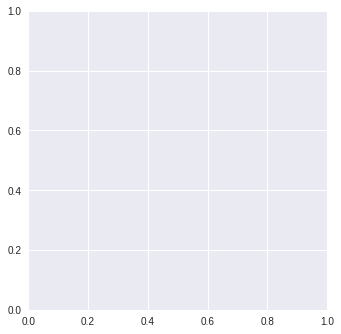

In [64]:
"""
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once in a notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Create & upload a file.
uploaded = drive.CreateFile({'title': 'X_train.csv'})
uploaded.SetContentFile('X_train.csv')
uploaded.Upload()
"""
from PIL import Image
from keras.preprocessing import image
from io import BytesIO

file_list = drive.ListFile({'q': "'root' in parents and trashed=false"}).GetList()
for f in file_list:
  print('title: %s, id: %s' % (f['title'], f['id']))
  if f['title']=='elephant.jpg':
    ID=f['id']

downloaded = drive.CreateFile({'id': ID})
downloaded.GetContentFile('elephant.jpg')  

img=Image.open('elephant.jpg')

import matplotlib.pyplot as plt
img = img.resize((224, 224))
I=image.img_to_array(img)
print(I)
plt.imshow(I)

##RBF

In [0]:
from keras.engine import InputSpec, Layer
from keras.legacy import interfaces
#@title COUCHES RBF
###________TROIS CLASSES POUR IMPLEMENTER DES COUCHES RBF________###

class RBFLayer(Layer):
    def __init__(self, alpha=1000.0, alpha_initializer='zeros',
                 alpha_regularizer=None,
                 alpha_constraint=None, 
                 **kwargs):
        super(RBFLayer, self).__init__(**kwargs)
        self.supports_masking = True
        self.supports_masking = True
        self.alpha_initializer = keras.initializers.Constant(value=1000.0)
        self.alpha_regularizer = regularizers.get(alpha_regularizer)
        self.alpha_constraint = constraints.get(alpha_constraint)
        self.alpha = self.add_weight(shape=(1,),
                                     name='alpha',
                                     initializer=self.alpha_initializer,
                                     regularizer=self.alpha_regularizer,
                                     constraint=self.alpha_constraint)
        self.trainable = False

    def call(self, inputs):
        y = - inputs / self.alpha[0]
        y = keras.backend.exp(y)
        return y

    def get_config(self):
        config = {
            'alpha_initializer': initializers.serialize(self.alpha_initializer),
            'alpha_regularizer': regularizers.serialize(self.alpha_regularizer),
            'alpha_constraint': constraints.serialize(self.alpha_constraint),
            'shared_axes': self.shared_axes
        }
        base_config = super(RBFLayer, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))

    def compute_output_shape(self, input_shape):
        return input_shape

class RBF(Layer):
    @interfaces.legacy_dense_support
    def __init__(self, units,
                 activation=None,
                 use_bias=False,
                 kernel_initializer='TruncatedNormal',
                 bias_initializer='zeros',
                 kernel_regularizer=None,
                 bias_regularizer=None,
                 activity_regularizer=None,
                 kernel_constraint=None,
                 bias_constraint=None,
                 sigma = 1000.0,
                 **kwargs):
        if 'input_shape' not in kwargs and 'input_dim' in kwargs:
            kwargs['input_shape'] = (kwargs.pop('input_dim'),)
        super(RBF, self).__init__(**kwargs)
        self.units = units
        self.activation = activations.get(activation)
        self.use_bias = use_bias
        self.kernel_initializer = initializers.get(kernel_initializer)
        self.bias_initializer = initializers.get(bias_initializer)
        self.kernel_regularizer = regularizers.get(kernel_regularizer)
        self.bias_regularizer = regularizers.get(bias_regularizer)
        self.activity_regularizer = regularizers.get(activity_regularizer)
        self.kernel_constraint = constraints.get(kernel_constraint)
        self.bias_constraint = constraints.get(bias_constraint)
        self.sigma = sigma
        self.input_spec = InputSpec(min_ndim=2)
        self.supports_masking = True

    def build(self, input_shape):
        assert len(input_shape) >= 2
        input_dim = input_shape[-1]

        self.kernel = self.add_weight(shape=(input_dim, self.units),
                                      initializer=self.kernel_initializer,
                                      name='kernel',
                                      regularizer=self.kernel_regularizer,
                                      constraint=self.kernel_constraint)
        if self.use_bias:
            self.bias = self.add_weight(shape=(self.units,),
                                        initializer=self.bias_initializer,
                                        name='bias',
                                        regularizer=self.bias_regularizer,
                                        constraint=self.bias_constraint)
        else:
            self.bias = None
        self.input_spec = InputSpec(min_ndim=2, axes={-1: input_dim})
        self.built = True

    def call(self, inputs):
        norm_x = K.transpose(K.sum(inputs * inputs , axis=1))
        norm_w = K.sum(self.kernel *self.kernel , axis=0)
        norm_x = keras.backend.expand_dims(norm_x, axis=-1)
        prod_scal = -2 * K.dot(inputs, self.kernel)
        print ("Shapes : ", norm_x.shape, norm_w.shape, prod_scal.shape) 
        a = tf.add(norm_x, prod_scal) # -2 *  prod_scal)
        y = tf.add(a, norm_w )
        y = - y / self.sigma
        y = keras.backend.exp(y)
        return y

    def compute_output_shape(self, input_shape):
        assert input_shape and len(input_shape) >= 2
        assert input_shape[-1]
        output_shape = list(input_shape)
        output_shape[-1] = self.units
        return tuple(output_shape)

    def get_config(self):
        config = {
            'units': self.units,
            'activation': activations.serialize(self.activation),
            'use_bias': self.use_bias,
            'kernel_initializer': initializers.serialize(self.kernel_initializer),
            'bias_initializer': initializers.serialize(self.bias_initializer),
            'kernel_regularizer': regularizers.serialize(self.kernel_regularizer),
            'bias_regularizer': regularizers.serialize(self.bias_regularizer),
            'activity_regularizer': regularizers.serialize(self.activity_regularizer),
            'kernel_constraint': constraints.serialize(self.kernel_constraint),
            'bias_constraint': constraints.serialize(self.bias_constraint)
        }
        base_config = super(RBF, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))

class RBF2(Layer):
    @interfaces.legacy_dense_support
    def __init__(self, units,
                 activation=None,
                 use_bias=False,
                 kernel_initializer='TruncatedNormal',
                 bias_initializer='zeros',
                 kernel_regularizer=None,
                 bias_regularizer=None,
                 activity_regularizer=None,
                 kernel_constraint=None,
                 bias_constraint=None,
                 **kwargs):
        if 'input_shape' not in kwargs and 'input_dim' in kwargs:
            kwargs['input_shape'] = (kwargs.pop('input_dim'),)
        super(RBF2, self).__init__(**kwargs)
        self.units = units
        self.activation = activations.get(activation)
        self.use_bias = use_bias
        self.kernel_initializer = initializers.get(kernel_initializer)
        self.bias_initializer = initializers.get(bias_initializer)
        self.kernel_regularizer = regularizers.get(kernel_regularizer)
        self.bias_regularizer = regularizers.get(bias_regularizer)
        self.activity_regularizer = regularizers.get(activity_regularizer)
        self.kernel_constraint = constraints.get(kernel_constraint)
        self.bias_constraint = constraints.get(bias_constraint)
        self.input_spec = InputSpec(min_ndim=2)
        self.supports_masking = True

    def build(self, input_shape):
        assert len(input_shape) >= 2
        input_dim = input_shape[-1]
        self.kernel = self.add_weight(shape=(input_dim, self.units),
                                      initializer=self.kernel_initializer,
                                      name='kernel',
                                      regularizer=self.kernel_regularizer,
                                      constraint=self.kernel_constraint)
        if self.use_bias:
            self.bias = self.add_weight(shape=(self.units,),
                                        initializer=self.bias_initializer,
                                        name='bias',
                                        regularizer=self.bias_regularizer,
                                        constraint=self.bias_constraint)
        else:
            self.bias = None
        self.input_spec = InputSpec(min_ndim=2, axes={-1: input_dim})
        self.built = True

    def call(self, inputs):
        norm_x = K.transpose(K.sum(inputs * inputs , axis=1))
        norm_w = K.sum(self.kernel *self.kernel , axis=0)
        norm_x = keras.backend.expand_dims(norm_x, axis=-1)
        prod_scal = -2 * K.dot(inputs, self.kernel)
        print ("Shapes : ", norm_x.shape, norm_w.shape, prod_scal.shape) 
        a = tf.add(norm_x, prod_scal) # -2 *  prod_scal)
        y = tf.add(a, norm_w )
        return y

    def compute_output_shape(self, input_shape):
        assert input_shape and len(input_shape) >= 2
        assert input_shape[-1]
        output_shape = list(input_shape)
        output_shape[-1] = self.units
        return tuple(output_shape)

    def get_config(self):
        config = {
            'units': self.units,
            'activation': activations.serialize(self.activation),
            'use_bias': self.use_bias,
            'kernel_initializer': initializers.serialize(self.kernel_initializer),
            'bias_initializer': initializers.serialize(self.bias_initializer),
            'kernel_regularizer': regularizers.serialize(self.kernel_regularizer),
            'bias_regularizer': regularizers.serialize(self.bias_regularizer),
            'activity_regularizer': regularizers.serialize(self.activity_regularizer),
            'kernel_constraint': constraints.serialize(self.kernel_constraint),
            'bias_constraint': constraints.serialize(self.bias_constraint)
        }
        base_config = super(RBF2, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))

##Tests

###Data

Avec des données du Drive

In [0]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once in a notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
seuil=0.32

In [217]:
from sklearn.utils import shuffle

file_list = drive.ListFile({'q': "'root' in parents and trashed=false"}).GetList()
for f in file_list:
  if f['title']=='Images_gan.csv':
    ID=f['id']

downloaded = drive.CreateFile({'id':ID})
downloaded.GetContentFile('Images_gan.csv')  

import pandas as pd
dossier1 = pd.read_csv('Images_gan.csv') 

good_examples=dossier1[(dossier1.resultat<seuil)]

good_examples=good_examples.drop(['resultat'],axis=1)

print("Nombre d'images conservees : ",len(good_examples))

good_examples=good_examples.reset_index()
good_examples=good_examples.drop(['index'],axis=1)

good_examples['target']=0.9
print("good_examples.shape : ",good_examples.shape)


# Load MNIST data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = (X_train.astype(np.float32) - 127.5)/127.5

X_train=pd.DataFrame(X_train.reshape(60000,28*28))
#good examples same reshape as X train 
X_train['target']=0
print("X_train.shape : ",X_train.shape)


n=X_train.shape[0]
m=good_examples.shape[0]
xyz=np.zeros((n+m,28*28))
xyz=pd.DataFrame(xyz)
xyz['target']=0.1
print("xyz.shape : ",xyz.shape)

for z in range(n):
  if z%1000==0:
    print("Image n°"+str(z)+"/"+str(n+m))
  for i in range(28*28):
    #print("Colonne n°"+str(i)+"/"+str(785))
    xyz.set_value(z,i,X_train.get_value(z,i))
  xyz.set_value(z,'target',X_train.get_value(z,'target'))
print("Copie de X_train : done !")
for z in range(m):
  if z%1000==0:
    print("Image n°"+str(n+z)+"/"+str(n+m))
  for i in range(28*28):    
    #print("Colonne n°"+str(i)+"/"+str(785))
    xyz.set_value(n+z,i,good_examples.iat[z,i])
  xyz.set_value(z,'target',good_examples.at[z,'target'])
print("Copie de good_examples : Done !")

xyz = shuffle(xyz)

from sklearn.model_selection import train_test_split
xyz.target[xyz.target!=0]=0.9
xyz_train,xyz_val=train_test_split(xyz,test_size=0.2)
y_train=xyz_train.target.values
x_train=xyz_train.drop(['target'],axis=1)
y_val=xyz_val.target.values
x_val=xyz_val.drop(['target'],axis=1)

print(x_train.shape)
x_train=x_train.values.astype('float32').reshape(x_train.shape[0],1,28,28)
x_val=x_val.values.astype('float32').reshape(x_val.shape[0],1,28,28)


Nombre d'images conservees :  2413
good_examples.shape :  (2413, 785)
X_train.shape :  (60000, 785)
xyz.shape :  (62413, 785)
Image n°0/62413


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:50: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:50: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:51: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:51: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


Image n°1000/62413
Image n°2000/62413
Image n°3000/62413
Image n°4000/62413
Image n°5000/62413
Image n°6000/62413
Image n°7000/62413
Image n°8000/62413
Image n°9000/62413
Image n°10000/62413
Image n°11000/62413
Image n°12000/62413
Image n°13000/62413
Image n°14000/62413
Image n°15000/62413
Image n°16000/62413
Image n°17000/62413
Image n°18000/62413
Image n°19000/62413
Image n°20000/62413
Image n°21000/62413
Image n°22000/62413
Image n°23000/62413
Image n°24000/62413
Image n°25000/62413
Image n°26000/62413
Image n°27000/62413
Image n°28000/62413
Image n°29000/62413
Image n°30000/62413
Image n°31000/62413
Image n°32000/62413
Image n°33000/62413
Image n°34000/62413
Image n°35000/62413
Image n°36000/62413
Image n°37000/62413
Image n°38000/62413
Image n°39000/62413
Image n°40000/62413
Image n°41000/62413
Image n°42000/62413
Image n°43000/62413
Image n°44000/62413
Image n°45000/62413
Image n°46000/62413
Image n°47000/62413
Image n°48000/62413
Image n°49000/62413
Image n°50000/62413
Image n°5

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:58: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:59: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


Image n°61000/62413
Image n°62000/62413
Copie de good_examples : Done !
(49930, 784)


En refaisant les données

In [0]:
"""dossier1=[]
for i in range(len(dossier)):
  dossier1.append(dossier[i].reshape(28*28))
  
dossier1=np.reshape(dossier1,(len(dossier),28*28))

dossier1.shape
dossier1=pd.DataFrame(dossier1)
dossier1['resultat']=pd.Series(resultat)

good_examples=dossier1[(dossier1.resultat<seuil)]


good_examples=good_examples.drop(['resultat'],axis=1)

print(len(good_examples))

good_examples=good_examples.reset_index()
#good_examples=good_examples.drop(['level_0'],axis=1)
good_examples=good_examples.drop(['index'],axis=1)

good_examples['target']=0.9


# Load MNIST data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = (X_train.astype(np.float32) - 127.5)/127.5

X_train=pd.DataFrame(X_train.reshape(60000,28*28))
#good examples same reshape as X train 
X_train['target']=0

X_train=X_train.append(good_examples)

from sklearn.utils import shuffle
X_train = shuffle(X_train)
X_train.to_csv('X_train_48.csv',index=False)


# Install the PyDrive wrapper & import libraries.
# This only needs to be done once in a notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Create & upload a file.
uploaded = drive.CreateFile({'title': 'X_train.csv'})
uploaded.SetContentFile('X_train.csv')
uploaded.Upload()
#print('Uploaded file with ID {}'.format(uploaded.get('id')))

"""
#2. Get the file
downloaded = drive.CreateFile({'id':'1wwp5a8iHb8WXXQ336y6sGHluVhaf6qhm'}) # replace the id with id of file you want to access
downloaded.GetContentFile('X_train.csv')  
"""
#3. Read file as panda dataframe
xyz = pd.read_csv('X_train.csv') 



from sklearn.model_selection import train_test_split
xyz.target[xyz.target!=0]=0.9
xyz_train,xyz_val=train_test_split(xyz,test_size=0.2)
y_train=xyz_train.target.values
x_train=xyz_train.drop(['target'],axis=1)
y_val=xyz_val.target.values
x_val=xyz_val.drop(['target'],axis=1)

x_train=x_train.values.astype('float32').reshape(73266,1,28,28)
x_val=x_val.values.astype('float32').reshape(18317,1,28,28)"""


###Rejector

In [165]:
from keras import activations, initializers, regularizers, constraints,metrics
from keras.optimizers import Adam, Adagrad
adagrad = Adagrad(lr=0.001, epsilon=None, decay=0.0) #c'est celui-là qui est utilisé pour tous les modèles


# Rejector 1
rejector= Sequential()
rejector.add(Conv2D(64, kernel_size=(3, 3), padding='same', input_shape=(1, 28, 28),activation='relu'))
rejector.add(MaxPooling2D(pool_size=(3, 3)))
rejector.add(Conv2D(128, (3, 3), activation='relu') )
rejector.add(MaxPooling2D(pool_size=(3, 3)) )
rejector.add(Dropout(0.25))
rejector.add(Flatten())
rejector.add(Dense(128, activation='relu'))
rejector.add(RBF2(300) )
rejector.add(RBFLayer(alpha=2000.0) )
rejector.add(Dense(1, activation='sigmoid', name='r_output', use_bias=False))


rejector.compile(optimizer=adagrad, loss= 'mse', metrics=['acc'])  #  metrics=['acc', f1, precision, recall])
rejector.summary()




Shapes :  (?, 1) (300,) (?, 300)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 64, 28, 28)        640       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 64, 9, 9)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 128, 7, 7)         73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 128, 2, 2)         0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 128, 2, 2)         0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)   

In [218]:
from keras.callbacks import ReduceLROnPlateau
# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', patience=3, verbose=1, factor=0.5, min_lr=0.00001)


epochs = 50 
batch_size = 60
#rejector.fit(x_train, y_train, nb_epoch=epochs, batch_size=batch_size, callbacks=[learning_rate_reduction],validation_data = (x_val, y_val))
rejector.fit(x_train, y_train, nb_epoch=epochs, batch_size=batch_size, validation_data = (x_val, y_val))


Train on 49930 samples, validate on 12483 samples
Epoch 1/50
  780/49930 [..............................] - ETA: 12s - loss: 0.0566 - acc: 0.9256

/usr/local/lib/python3.6/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


49930/49930 [==============================] - 13s 253us/step - loss: 0.0482 - acc: 0.9224 - val_loss: 0.0444 - val_acc: 0.9239
Epoch 2/50
49930/49930 [==============================] - 13s 252us/step - loss: 0.0459 - acc: 0.9224 - val_loss: 0.0443 - val_acc: 0.9239
Epoch 3/50
23580/49930 [=============>................] - ETA: 6s - loss: 0.0462 - acc: 0.9215

49930/49930 [==============================] - 13s 252us/step - loss: 0.0458 - acc: 0.9224 - val_loss: 0.0442 - val_acc: 0.9239
Epoch 4/50
49930/49930 [==============================] - 13s 252us/step - loss: 0.0459 - acc: 0.9224 - val_loss: 0.0442 - val_acc: 0.9239
Epoch 5/50
28800/49930 [================>.............] - ETA: 4s - loss: 0.0470 - acc: 0.9211

49930/49930 [==============================] - 13s 253us/step - loss: 0.0457 - acc: 0.9224 - val_loss: 0.0441 - val_acc: 0.9239
Epoch 6/50
49930/49930 [==============================] - 13s 251us/step - loss: 0.0457 - acc: 0.9224 - val_loss: 0.0441 - val_acc: 0.9239
Epoch 7/50
29880/49930 [================>.............] - ETA: 4s - loss: 0.0455 - acc: 0.9229

49930/49930 [==============================] - 13s 252us/step - loss: 0.0456 - acc: 0.9224 - val_loss: 0.0441 - val_acc: 0.9239
Epoch 8/50
49930/49930 [==============================] - 13s 251us/step - loss: 0.0456 - acc: 0.9224 - val_loss: 0.0440 - val_acc: 0.9239
Epoch 9/50
30240/49930 [=================>............] - ETA: 4s - loss: 0.0453 - acc: 0.9222

49930/49930 [==============================] - 13s 252us/step - loss: 0.0457 - acc: 0.9224 - val_loss: 0.0440 - val_acc: 0.9239
Epoch 10/50
49930/49930 [==============================] - 13s 252us/step - loss: 0.0456 - acc: 0.9224 - val_loss: 0.0440 - val_acc: 0.9239
Epoch 11/50
29940/49930 [================>.............] - ETA: 4s - loss: 0.0446 - acc: 0.9248

49930/49930 [==============================] - 13s 253us/step - loss: 0.0455 - acc: 0.9224 - val_loss: 0.0440 - val_acc: 0.9239
Epoch 12/50
49930/49930 [==============================] - 13s 250us/step - loss: 0.0454 - acc: 0.9224 - val_loss: 0.0439 - val_acc: 0.9239
Epoch 13/50
29820/49930 [================>.............] - ETA: 4s - loss: 0.0450 - acc: 0.9237

49930/49930 [==============================] - 13s 252us/step - loss: 0.0454 - acc: 0.9224 - val_loss: 0.0438 - val_acc: 0.9239
Epoch 14/50
49930/49930 [==============================] - 13s 252us/step - loss: 0.0454 - acc: 0.9224 - val_loss: 0.0438 - val_acc: 0.9239
Epoch 15/50
29760/49930 [================>.............] - ETA: 4s - loss: 0.0458 - acc: 0.9216

49930/49930 [==============================] - 13s 253us/step - loss: 0.0453 - acc: 0.9224 - val_loss: 0.0438 - val_acc: 0.9239
Epoch 16/50
49930/49930 [==============================] - 13s 253us/step - loss: 0.0453 - acc: 0.9224 - val_loss: 0.0438 - val_acc: 0.9239
Epoch 17/50
30060/49930 [=================>............] - ETA: 4s - loss: 0.0463 - acc: 0.9206

49930/49930 [==============================] - 13s 253us/step - loss: 0.0452 - acc: 0.9224 - val_loss: 0.0438 - val_acc: 0.9239
Epoch 18/50
49930/49930 [==============================] - 13s 252us/step - loss: 0.0453 - acc: 0.9224 - val_loss: 0.0437 - val_acc: 0.9239
Epoch 19/50
29940/49930 [================>.............] - ETA: 4s - loss: 0.0449 - acc: 0.9230

49930/49930 [==============================] - 13s 252us/step - loss: 0.0452 - acc: 0.9224 - val_loss: 0.0437 - val_acc: 0.9239
Epoch 20/50
49930/49930 [==============================] - 13s 252us/step - loss: 0.0451 - acc: 0.9224 - val_loss: 0.0436 - val_acc: 0.9239
Epoch 21/50
30060/49930 [=================>............] - ETA: 4s - loss: 0.0449 - acc: 0.9230

49930/49930 [==============================] - 13s 251us/step - loss: 0.0451 - acc: 0.9224 - val_loss: 0.0436 - val_acc: 0.9239
Epoch 22/50
49930/49930 [==============================] - 13s 252us/step - loss: 0.0451 - acc: 0.9224 - val_loss: 0.0435 - val_acc: 0.9239
Epoch 23/50
29940/49930 [================>.............] - ETA: 4s - loss: 0.0452 - acc: 0.9219

49930/49930 [==============================] - 13s 254us/step - loss: 0.0449 - acc: 0.9224 - val_loss: 0.0435 - val_acc: 0.9239
Epoch 24/50
49930/49930 [==============================] - 13s 253us/step - loss: 0.0450 - acc: 0.9224 - val_loss: 0.0435 - val_acc: 0.9239
Epoch 25/50
29940/49930 [================>.............] - ETA: 4s - loss: 0.0455 - acc: 0.9222

49930/49930 [==============================] - 13s 254us/step - loss: 0.0451 - acc: 0.9224 - val_loss: 0.0435 - val_acc: 0.9239
Epoch 26/50
49930/49930 [==============================] - 13s 255us/step - loss: 0.0449 - acc: 0.9224 - val_loss: 0.0435 - val_acc: 0.9239
Epoch 27/50
29940/49930 [================>.............] - ETA: 4s - loss: 0.0451 - acc: 0.9222

49930/49930 [==============================] - 13s 253us/step - loss: 0.0450 - acc: 0.9224 - val_loss: 0.0434 - val_acc: 0.9239
Epoch 28/50
49930/49930 [==============================] - 13s 253us/step - loss: 0.0449 - acc: 0.9224 - val_loss: 0.0434 - val_acc: 0.9239
Epoch 29/50
30000/49930 [=================>............] - ETA: 4s - loss: 0.0437 - acc: 0.9244

49930/49930 [==============================] - 13s 253us/step - loss: 0.0448 - acc: 0.9224 - val_loss: 0.0433 - val_acc: 0.9239
Epoch 30/50
49930/49930 [==============================] - 12s 250us/step - loss: 0.0448 - acc: 0.9224 - val_loss: 0.0433 - val_acc: 0.9239
Epoch 31/50
30000/49930 [=================>............] - ETA: 4s - loss: 0.0435 - acc: 0.9238

49930/49930 [==============================] - 12s 249us/step - loss: 0.0448 - acc: 0.9224 - val_loss: 0.0433 - val_acc: 0.9239
Epoch 32/50
49930/49930 [==============================] - 13s 251us/step - loss: 0.0448 - acc: 0.9224 - val_loss: 0.0433 - val_acc: 0.9239
Epoch 33/50
30000/49930 [=================>............] - ETA: 4s - loss: 0.0433 - acc: 0.9247

49930/49930 [==============================] - 13s 252us/step - loss: 0.0447 - acc: 0.9224 - val_loss: 0.0432 - val_acc: 0.9239
Epoch 34/50
49930/49930 [==============================] - 13s 251us/step - loss: 0.0448 - acc: 0.9224 - val_loss: 0.0432 - val_acc: 0.9239
Epoch 35/50
29940/49930 [================>.............] - ETA: 4s - loss: 0.0457 - acc: 0.9211

49930/49930 [==============================] - 13s 252us/step - loss: 0.0447 - acc: 0.9224 - val_loss: 0.0433 - val_acc: 0.9239
Epoch 36/50
49930/49930 [==============================] - 13s 252us/step - loss: 0.0446 - acc: 0.9224 - val_loss: 0.0432 - val_acc: 0.9239
Epoch 37/50
29940/49930 [================>.............] - ETA: 4s - loss: 0.0446 - acc: 0.9227

49930/49930 [==============================] - 13s 251us/step - loss: 0.0447 - acc: 0.9224 - val_loss: 0.0431 - val_acc: 0.9239
Epoch 38/50
49930/49930 [==============================] - 13s 252us/step - loss: 0.0446 - acc: 0.9224 - val_loss: 0.0431 - val_acc: 0.9239
Epoch 39/50
30000/49930 [=================>............] - ETA: 4s - loss: 0.0455 - acc: 0.9208

49930/49930 [==============================] - 13s 252us/step - loss: 0.0445 - acc: 0.9224 - val_loss: 0.0432 - val_acc: 0.9239
Epoch 40/50
49930/49930 [==============================] - 13s 251us/step - loss: 0.0445 - acc: 0.9224 - val_loss: 0.0431 - val_acc: 0.9239
Epoch 41/50
29880/49930 [================>.............] - ETA: 4s - loss: 0.0442 - acc: 0.9240

49930/49930 [==============================] - 12s 250us/step - loss: 0.0446 - acc: 0.9224 - val_loss: 0.0430 - val_acc: 0.9239
Epoch 42/50
49930/49930 [==============================] - 13s 252us/step - loss: 0.0445 - acc: 0.9224 - val_loss: 0.0430 - val_acc: 0.9239
Epoch 43/50
30000/49930 [=================>............] - ETA: 4s - loss: 0.0441 - acc: 0.9229

49930/49930 [==============================] - 12s 250us/step - loss: 0.0445 - acc: 0.9224 - val_loss: 0.0430 - val_acc: 0.9239
Epoch 44/50
49930/49930 [==============================] - 12s 250us/step - loss: 0.0445 - acc: 0.9224 - val_loss: 0.0430 - val_acc: 0.9239
Epoch 45/50
29940/49930 [================>.............] - ETA: 4s - loss: 0.0444 - acc: 0.9227

49930/49930 [==============================] - 13s 251us/step - loss: 0.0444 - acc: 0.9224 - val_loss: 0.0429 - val_acc: 0.9239
Epoch 46/50
49930/49930 [==============================] - 12s 250us/step - loss: 0.0444 - acc: 0.9224 - val_loss: 0.0430 - val_acc: 0.9239
Epoch 47/50
30060/49930 [=================>............] - ETA: 4s - loss: 0.0438 - acc: 0.9235

49930/49930 [==============================] - 12s 250us/step - loss: 0.0444 - acc: 0.9224 - val_loss: 0.0429 - val_acc: 0.9239
Epoch 48/50
49930/49930 [==============================] - 12s 250us/step - loss: 0.0443 - acc: 0.9224 - val_loss: 0.0429 - val_acc: 0.9239
Epoch 49/50
30060/49930 [=================>............] - ETA: 4s - loss: 0.0442 - acc: 0.9227

49930/49930 [==============================] - 13s 253us/step - loss: 0.0443 - acc: 0.9224 - val_loss: 0.0429 - val_acc: 0.9239
Epoch 50/50
49930/49930 [==============================] - 12s 250us/step - loss: 0.0443 - acc: 0.9224 - val_loss: 0.0428 - val_acc: 0.9239


###Classifieur

In [8]:
from google.colab import files
uploaded = files.upload()

Saving 10_classifier to 10_classifier


In [9]:
model_95=load_model('10_classifier')

In [79]:
!ls

10_classifier  datalab	Images_gan.csv


In [12]:
(X_t, y_t), (X_test, y_test) = mnist.load_data()


X_test=X_test.reshape(X_test.shape[0],28,28,1)
y_test = np_utils.to_categorical(y_test, 10)

X_test = (X_test.astype(np.float32) - 127.5)/127.5

print(model_95.evaluate(X_test,y_test))

10000/10000 [==============================] - 3s 296us/step
[0.1397708670515567, 0.9554]


###Courbe

In [41]:
seuils_p=np.concatenate((np.linspace(0,0.8,10),np.linspace(0.8,0.99,10),np.linspace(0.99,0.999,10),np.linspace(0.999,1,5)))


seuils_e=np.concatenate((np.linspace(0,0.01,8),np.linspace(0.01,0.1,5),np.linspace(0.1,0.3,20),np.linspace(0.3,0.9,8),np.linspace(0.9,1,8),np.linspace(1,2.2,10)))


xs,ys,xe,ye=test_seuil_entropie_95(seuils_p,seuils_e)

1/35
10000/10000 [==============================] - 3s 340us/step
Seuil :  0.0
Nombre d'images conservées : 10000/10000 = 100.0%
Nombre d'images rejetées : 0
Score avec les images conservées :  [0.1397708673275076, 0.9554]
[0, 0.9554]
2/35
10000/10000 [==============================] - 3s 341us/step
Seuil :  0.08888888888888889
Nombre d'images conservées : 10000/10000 = 100.0%
Nombre d'images rejetées : 0
Score avec les images conservées :  [0.1397708673275076, 0.9554]
[0, 0.9554]
3/35
10000/10000 [==============================] - 3s 346us/step
Seuil :  0.17777777777777778
Nombre d'images conservées : 10000/10000 = 100.0%
Nombre d'images rejetées : 0
Score avec les images conservées :  [0.1397708673275076, 0.9554]
[0, 0.9554]
4/35
7056/9997 [====================>.........] - ETA: 1s

9997/9997 [==============================] - 3s 350us/step
Seuil :  0.26666666666666666
Nombre d'images conservées : 9997/10000 = 99.97%
Nombre d'images rejetées : 3
Score avec les images conservées :  [0.13933667755750306, 0.9556867060118035]
[3, 0.9556867060118035]
5/35
9978/9978 [==============================] - 4s 357us/step
Seuil :  0.35555555555555557
Nombre d'images conservées : 9978/10000 = 99.78%
Nombre d'images rejetées : 22
Score avec les images conservées :  [0.13652869685728303, 0.9569051914211265]
[22, 0.9569051914211265]
6/35
9922/9922 [==============================] - 3s 338us/step
Seuil :  0.4444444444444445
Nombre d'images conservées : 9922/10000 = 99.22%
Nombre d'images rejetées : 78
Score avec les images conservées :  [0.12962629137054985, 0.9598871195323524]
[78, 0.9598871195323524]
7/35
6032/9776 [=================>............] - ETA: 1s

9776/9776 [==============================] - 3s 342us/step
Seuil :  0.5333333333333333
Nombre d'images conservées : 9776/10000 = 97.76%
Nombre d'images rejetées : 224
Score avec les images conservées :  [0.11464123334849952, 0.9673690671031097]
[224, 0.9673690671031097]
8/35
9596/9596 [==============================] - 3s 344us/step
Seuil :  0.6222222222222222
Nombre d'images conservées : 9596/10000 = 95.96000000000001%
Nombre d'images rejetées : 404
Score avec les images conservées :  [0.0998304309686409, 0.9734264276781992]
[404, 0.9734264276781992]
9/35
9396/9396 [==============================] - 3s 340us/step
Seuil :  0.7111111111111111
Nombre d'images conservées : 9396/10000 = 93.96%
Nombre d'images rejetées : 604
Score avec les images conservées :  [0.08497530676627896, 0.9798850574712644]
[604, 0.9798850574712644]
10/35
6320/9124 [===================>..........] - ETA: 0s

9124/9124 [==============================] - 3s 347us/step
Seuil :  0.8
Nombre d'images conservées : 9124/10000 = 91.24%
Nombre d'images rejetées : 876
Score avec les images conservées :  [0.066537605203849, 0.9862998684787374]
[876, 0.9862998684787374]
11/35
9124/9124 [==============================] - 3s 342us/step
Seuil :  0.8
Nombre d'images conservées : 9124/10000 = 91.24%
Nombre d'images rejetées : 876
Score avec les images conservées :  [0.066537605203849, 0.9862998684787374]
[876, 0.9862998684787374]
12/35
9036/9036 [==============================] - 3s 345us/step
Seuil :  0.8211111111111111
Nombre d'images conservées : 9036/10000 = 90.36%
Nombre d'images rejetées : 964
Score avec les images conservées :  [0.062347822018906034, 0.9873837981407703]
[964, 0.9873837981407703]
13/35
7712/8948 [========================>.....] - ETA: 0s

8948/8948 [==============================] - 3s 342us/step
Seuil :  0.8422222222222222
Nombre d'images conservées : 8948/10000 = 89.48%
Nombre d'images rejetées : 1052
Score avec les images conservées :  [0.05579123399940652, 0.9892713455520786]
[1052, 0.9892713455520786]
14/35
8842/8842 [==============================] - 3s 349us/step
Seuil :  0.8633333333333334
Nombre d'images conservées : 8842/10000 = 88.42%
Nombre d'images rejetées : 1158
Score avec les images conservées :  [0.05008892252718117, 0.9907260800723818]
[1158, 0.9907260800723818]
15/35
8715/8715 [==============================] - 3s 338us/step
Seuil :  0.8844444444444445
Nombre d'images conservées : 8715/10000 = 87.15%
Nombre d'images rejetées : 1285
Score avec les images conservées :  [0.04379967164987729, 0.9924268502581756]
[1285, 0.9924268502581756]
16/35
7232/8565 [========================>.....] - ETA: 0s

8565/8565 [==============================] - 3s 343us/step
Seuil :  0.9055555555555556
Nombre d'images conservées : 8565/10000 = 85.65%
Nombre d'images rejetées : 1435
Score avec les images conservées :  [0.03899379848085031, 0.9932282545242265]
[1435, 0.9932282545242265]
17/35
8370/8370 [==============================] - 3s 341us/step
Seuil :  0.9266666666666666
Nombre d'images conservées : 8370/10000 = 83.7%
Nombre d'images rejetées : 1630
Score avec les images conservées :  [0.031906896186260934, 0.9951015531660693]
[1630, 0.9951015531660693]
18/35
8098/8098 [==============================] - 3s 344us/step
Seuil :  0.9477777777777778
Nombre d'images conservées : 8098/10000 = 80.97999999999999%
Nombre d'images rejetées : 1902
Score avec les images conservées :  [0.02557238768654222, 0.9962953815756977]
[1902, 0.9962953815756977]
19/35
7568/7626 [============================>.] - ETA: 0s

7626/7626 [==============================] - 3s 340us/step
Seuil :  0.9688888888888889
Nombre d'images conservées : 7626/10000 = 76.25999999999999%
Nombre d'images rejetées : 2374
Score avec les images conservées :  [0.017405415336688632, 0.9977707841594545]
[2374, 0.9977707841594545]
20/35
6322/6322 [==============================] - 2s 344us/step
Seuil :  0.99
Nombre d'images conservées : 6322/10000 = 63.22%
Nombre d'images rejetées : 3678
Score avec les images conservées :  [0.010878986999887045, 0.9987345776652958]
[3678, 0.9987345776652958]
21/35
6322/6322 [==============================] - 2s 350us/step
Seuil :  0.99
Nombre d'images conservées : 6322/10000 = 63.22%
Nombre d'images rejetées : 3678
Score avec les images conservées :  [0.010878986999887045, 0.9987345776652958]
[3678, 0.9987345776652958]
22/35
6191/6191 [==============================] - 2s 340us/step
Seuil :  0.991
Nombre d'images conservées : 6191/10000 = 61.91%
Nombre d'images rejetées : 3809
Score avec les images

6027/6027 [==============================] - 2s 341us/step
Seuil :  0.992
Nombre d'images conservées : 6027/10000 = 60.27%
Nombre d'images rejetées : 3973
Score avec les images conservées :  [0.008278202138442787, 0.9990044798407167]
[3973, 0.9990044798407167]
24/35
5833/5833 [==============================] - 2s 346us/step
Seuil :  0.993
Nombre d'images conservées : 5833/10000 = 58.330000000000005%
Nombre d'images rejetées : 4167
Score avec les images conservées :  [0.006332851350865492, 0.9993142465283731]
[4167, 0.9993142465283731]
25/35
5616/5616 [==============================] - 2s 350us/step
Seuil :  0.994
Nombre d'images conservées : 5616/10000 = 56.16%
Nombre d'images rejetées : 4384
Score avec les images conservées :  [0.006325865821018045, 0.9992877492877493]
[4384, 0.9992877492877493]
26/35
5328/5328 [==============================] - 2s 348us/step
Seuil :  0.995
Nombre d'images conservées : 5328/10000 = 53.28000000000001%
Nombre d'images rejetées : 4672
Score avec les imag

4980/4980 [==============================] - 2s 344us/step
Seuil :  0.996
Nombre d'images conservées : 4980/10000 = 49.8%
Nombre d'images rejetées : 5020
Score avec les images conservées :  [0.0027190743137644716, 0.9997991967871486]
[5020, 0.9997991967871486]
28/35
4486/4486 [==============================] - 2s 338us/step
Seuil :  0.997
Nombre d'images conservées : 4486/10000 = 44.86%
Nombre d'images rejetées : 5514
Score avec les images conservées :  [0.0009652405372180121, 1.0]
[5514, 1.0]
29/35
3805/3805 [==============================] - 1s 345us/step
Seuil :  0.998
Nombre d'images conservées : 3805/10000 = 38.05%
Nombre d'images rejetées : 6195
Score avec les images conservées :  [0.0006966071915304907, 1.0]
[6195, 1.0]
30/35
2683/2683 [==============================] - 1s 344us/step
Seuil :  0.999
Nombre d'images conservées : 2683/10000 = 26.83%
Nombre d'images rejetées : 7317
Score avec les images conservées :  [0.00037967274194360096, 1.0]
[7317, 1.0]
31/35
2683/2683 [=======

1804/1804 [==============================] - 1s 342us/step
Seuil :  0.9995
Nombre d'images conservées : 1804/10000 = 18.04%
Nombre d'images rejetées : 8196
Score avec les images conservées :  [0.00020539070115741672, 1.0]
[8196, 1.0]
34/35
1147/1147 [==============================] - 0s 338us/step
Seuil :  0.99975
Nombre d'images conservées : 1147/10000 = 11.469999999999999%
Nombre d'images rejetées : 8853
Score avec les images conservées :  [0.0001162246988611576, 1.0]
[8853, 1.0]
35/35
Toutes les images sont rejetées...
[10000, 1]
1/59
Toutes les images sont rejetées...
2/59
447/447 [==============================] - 0s 365us/step
Seuil :  0.0014285714285714286
Nombre d'images conservées : 447/10000 = 4.47%
Nombre d'images rejetées : 9553
Score avec les images conservées :  [4.57871410169746e-05, 1.0]
3/59
920/920 [==============================] - 0s 345us/step
Seuil :  0.002857142857142857
Nombre d'images conservées : 920/10000 = 9.2%
Nombre d'images rejetées : 9080
Score avec les 

2270/2270 [==============================] - 1s 338us/step
Seuil :  0.01
Nombre d'images conservées : 2270/10000 = 22.7%
Nombre d'images rejetées : 7730
Score avec les images conservées :  [0.0002911210936568021, 1.0]
9/59
2270/2270 [==============================] - 1s 352us/step
Seuil :  0.01
Nombre d'images conservées : 2270/10000 = 22.7%
Nombre d'images rejetées : 7730
Score avec les images conservées :  [0.0002911210936568021, 1.0]
10/59
4399/4399 [==============================] - 1s 333us/step
Seuil :  0.0325
Nombre d'images conservées : 4399/10000 = 43.99%
Nombre d'images rejetées : 5601
Score avec les images conservées :  [0.0009293125671992778, 1.0]
11/59
5405/5405 [==============================] - 2s 343us/step
Seuil :  0.05500000000000001
Nombre d'images conservées : 5405/10000 = 54.05%
Nombre d'images rejetées : 4595
Score avec les images conservées :  [0.006357313630840535, 0.9992599444958372]
12/59
6024/6024 [==============================] - 2s 351us/step
Seuil :  0.07

6427/6427 [==============================] - 2s 350us/step
Seuil :  0.1
Nombre d'images conservées : 6427/10000 = 64.27000000000001%
Nombre d'images rejetées : 3573
Score avec les images conservées :  [0.010880015550929864, 0.9987552512836471]
14/59
6427/6427 [==============================] - 2s 351us/step
Seuil :  0.1
Nombre d'images conservées : 6427/10000 = 64.27000000000001%
Nombre d'images rejetées : 3573
Score avec les images conservées :  [0.010880015550929864, 0.9987552512836471]
15/59
6566/6566 [==============================] - 2s 346us/step
Seuil :  0.1105263157894737
Nombre d'images conservées : 6566/10000 = 65.66%
Nombre d'images rejetées : 3434
Score avec les images conservées :  [0.010895453470620374, 0.9987816021931161]
16/59
6698/6698 [==============================] - 2s 344us/step
Seuil :  0.12105263157894737
Nombre d'images conservées : 6698/10000 = 66.97999999999999%
Nombre d'images rejetées : 3302
Score avec les images conservées :  [0.011724187728536483, 0.99865

6822/6822 [==============================] - 2s 342us/step
Seuil :  0.13157894736842107
Nombre d'images conservées : 6822/10000 = 68.22%
Nombre d'images rejetées : 3178
Score avec les images conservées :  [0.01177311094284737, 0.9986807387862797]
18/59
6946/6946 [==============================] - 2s 351us/step
Seuil :  0.14210526315789473
Nombre d'images conservées : 6946/10000 = 69.46%
Nombre d'images rejetées : 3054
Score avec les images conservées :  [0.012467837951618968, 0.9985603224877627]
19/59
7045/7045 [==============================] - 2s 347us/step
Seuil :  0.15263157894736842
Nombre d'images conservées : 7045/10000 = 70.45%
Nombre d'images rejetées : 2955
Score avec les images conservées :  [0.012537063311982432, 0.9985805535841022]
20/59
7130/7130 [==============================] - 2s 346us/step
Seuil :  0.1631578947368421
Nombre d'images conservées : 7130/10000 = 71.3%
Nombre d'images rejetées : 2870
Score avec les images conservées :  [0.01262122415284382, 0.998597475455

7230/7230 [==============================] - 3s 350us/step
Seuil :  0.17368421052631577
Nombre d'images conservées : 7230/10000 = 72.3%
Nombre d'images rejetées : 2770
Score avec les images conservées :  [0.01349187292104502, 0.998478561549101]
22/59
7306/7306 [==============================] - 3s 355us/step
Seuil :  0.1842105263157895
Nombre d'images conservées : 7306/10000 = 73.06%
Nombre d'images rejetées : 2694
Score avec les images conservées :  [0.014247811210866688, 0.9983575143717492]
23/59
7388/7388 [==============================] - 3s 348us/step
Seuil :  0.19473684210526315
Nombre d'images conservées : 7388/10000 = 73.88%
Nombre d'images rejetées : 2612
Score avec les images conservées :  [0.014840834461829237, 0.9982403898213319]
24/59
7449/7449 [==============================] - 3s 346us/step
Seuil :  0.20526315789473684
Nombre d'images conservées : 7449/10000 = 74.49%
Nombre d'images rejetées : 2551
Score avec les images conservées :  [0.015476993945322091, 0.998120553094

7508/7508 [==============================] - 3s 349us/step
Seuil :  0.21578947368421053
Nombre d'images conservées : 7508/10000 = 75.08%
Nombre d'images rejetées : 2492
Score avec les images conservées :  [0.015575586102300532, 0.9981353223228556]
26/59
7573/7573 [==============================] - 3s 347us/step
Seuil :  0.22631578947368422
Nombre d'images conservées : 7573/10000 = 75.73%
Nombre d'images rejetées : 2427
Score avec les images conservées :  [0.016237023034137075, 0.9980192790175624]
27/59
7634/7634 [==============================] - 3s 341us/step
Seuil :  0.2368421052631579
Nombre d'images conservées : 7634/10000 = 76.34%
Nombre d'images rejetées : 2366
Score avec les images conservées :  [0.01680519946681322, 0.9979041131778884]
28/59
7686/7686 [==============================] - 3s 345us/step
Seuil :  0.24736842105263157
Nombre d'images conservées : 7686/10000 = 76.86%
Nombre d'images rejetées : 2314
Score avec les images conservées :  [0.01799179900711683, 0.99765807962

7734/7734 [==============================] - 3s 340us/step
Seuil :  0.2578947368421053
Nombre d'images conservées : 7734/10000 = 77.34%
Nombre d'images rejetées : 2266
Score avec les images conservées :  [0.01884832639262352, 0.9975433152314456]
30/59
7784/7784 [==============================] - 3s 340us/step
Seuil :  0.26842105263157895
Nombre d'images conservées : 7784/10000 = 77.84%
Nombre d'images rejetées : 2216
Score avec les images conservées :  [0.0189670970632799, 0.9975590955806783]
31/59
7829/7829 [==============================] - 3s 341us/step
Seuil :  0.2789473684210526
Nombre d'images conservées : 7829/10000 = 78.29%
Nombre d'images rejetées : 2171
Score avec les images conservées :  [0.019896763296684147, 0.9973176650913271]
32/59
7874/7874 [==============================] - 3s 339us/step
Seuil :  0.2894736842105263
Nombre d'images conservées : 7874/10000 = 78.74%
Nombre d'images rejetées : 2126
Score avec les images conservées :  [0.021105890474085273, 0.99707899415798

7922/7922 [==============================] - 3s 344us/step
Seuil :  0.3
Nombre d'images conservées : 7922/10000 = 79.22%
Nombre d'images rejetées : 2078
Score avec les images conservées :  [0.023048700110795087, 0.996718000504923]
34/59
7922/7922 [==============================] - 3s 340us/step
Seuil :  0.3
Nombre d'images conservées : 7922/10000 = 79.22%
Nombre d'images rejetées : 2078
Score avec les images conservées :  [0.023048700110795087, 0.996718000504923]
35/59
8191/8191 [==============================] - 3s 339us/step
Seuil :  0.38571428571428573
Nombre d'images conservées : 8191/10000 = 81.91000000000001%
Nombre d'images rejetées : 1809
Score avec les images conservées :  [0.02861984460897168, 0.9956049322427054]
36/59
8395/8395 [==============================] - 3s 340us/step
Seuil :  0.4714285714285714
Nombre d'images conservées : 8395/10000 = 83.95%
Nombre d'images rejetées : 1605
Score avec les images conservées :  [0.03269831493326051, 0.9947587849910661]
37/59
 944/8582

8582/8582 [==============================] - 3s 342us/step
Seuil :  0.5571428571428572
Nombre d'images conservées : 8582/10000 = 85.82%
Nombre d'images rejetées : 1418
Score avec les images conservées :  [0.038040523798797694, 0.9935912374737823]
38/59
8743/8743 [==============================] - 3s 351us/step
Seuil :  0.6428571428571429
Nombre d'images conservées : 8743/10000 = 87.42999999999999%
Nombre d'images rejetées : 1257
Score avec les images conservées :  [0.04420069009131672, 0.9921079720919593]
39/59
8864/8864 [==============================] - 3s 341us/step
Seuil :  0.7285714285714286
Nombre d'images conservées : 8864/10000 = 88.64%
Nombre d'images rejetées : 1136
Score avec les images conservées :  [0.05128581454842486, 0.990072202166065]
40/59
7936/8989 [=========================>....] - ETA: 0s

8989/8989 [==============================] - 3s 345us/step
Seuil :  0.8142857142857143
Nombre d'images conservées : 8989/10000 = 89.89%
Nombre d'images rejetées : 1011
Score avec les images conservées :  [0.056487614419885264, 0.9884303037045278]
41/59
9131/9131 [==============================] - 3s 353us/step
Seuil :  0.9
Nombre d'images conservées : 9131/10000 = 91.31%
Nombre d'images rejetées : 869
Score avec les images conservées :  [0.06554090543539426, 0.9856532690833425]
42/59
9131/9131 [==============================] - 3s 348us/step
Seuil :  0.9
Nombre d'images conservées : 9131/10000 = 91.31%
Nombre d'images rejetées : 869
Score avec les images conservées :  [0.06554090543539426, 0.9856532690833425]
43/59
8672/9149 [===========================>..] - ETA: 0s

9149/9149 [==============================] - 3s 349us/step
Seuil :  0.9142857142857143
Nombre d'images conservées : 9149/10000 = 91.49000000000001%
Nombre d'images rejetées : 851
Score avec les images conservées :  [0.06624969328448367, 0.985353590556345]
44/59
9165/9165 [==============================] - 3s 346us/step
Seuil :  0.9285714285714286
Nombre d'images conservées : 9165/10000 = 91.64999999999999%
Nombre d'images rejetées : 835
Score avec les images conservées :  [0.06688725147457296, 0.9851609383524277]
45/59
9180/9180 [==============================] - 3s 348us/step
Seuil :  0.9428571428571428
Nombre d'images conservées : 9180/10000 = 91.8%
Nombre d'images rejetées : 820
Score avec les images conservées :  [0.06758630848378105, 0.9848583877995642]
46/59
7408/9205 [=======================>......] - ETA: 0s

9205/9205 [==============================] - 3s 356us/step
Seuil :  0.9571428571428572
Nombre d'images conservées : 9205/10000 = 92.05%
Nombre d'images rejetées : 795
Score avec les images conservées :  [0.06951376144460107, 0.9840304182509506]
47/59
9223/9223 [==============================] - 3s 347us/step
Seuil :  0.9714285714285714
Nombre d'images conservées : 9223/10000 = 92.23%
Nombre d'images rejetées : 777
Score avec les images conservées :  [0.07007911587718668, 0.9839531605768188]
48/59
9244/9244 [==============================] - 3s 349us/step
Seuil :  0.9857142857142858
Nombre d'images conservées : 9244/10000 = 92.44%
Nombre d'images rejetées : 756
Score avec les images conservées :  [0.0715047463868176, 0.9833405452185201]
49/59
8224/9261 [=========================>....] - ETA: 0s

9261/9261 [==============================] - 3s 349us/step
Seuil :  1.0
Nombre d'images conservées : 9261/10000 = 92.61%
Nombre d'images rejetées : 739
Score avec les images conservées :  [0.07272080210730515, 0.9829392074290033]
50/59
9261/9261 [==============================] - 3s 353us/step
Seuil :  1.0
Nombre d'images conservées : 9261/10000 = 92.61%
Nombre d'images rejetées : 739
Score avec les images conservées :  [0.07272080210730515, 0.9829392074290033]
51/59
9458/9458 [==============================] - 3s 351us/step
Seuil :  1.1333333333333333
Nombre d'images conservées : 9458/10000 = 94.58%
Nombre d'images rejetées : 542
Score avec les images conservées :  [0.08634527797252806, 0.9764220765489533]
52/59
8528/9579 [=========================>....] - ETA: 0s

9579/9579 [==============================] - 3s 354us/step
Seuil :  1.2666666666666666
Nombre d'images conservées : 9579/10000 = 95.78999999999999%
Nombre d'images rejetées : 421
Score avec les images conservées :  [0.09579184298601998, 0.9725441069005115]
53/59
9683/9683 [==============================] - 3s 346us/step
Seuil :  1.4000000000000001
Nombre d'images conservées : 9683/10000 = 96.83%
Nombre d'images rejetées : 317
Score avec les images conservées :  [0.10375462090243572, 0.9698440565940307]
54/59
9764/9764 [==============================] - 3s 340us/step
Seuil :  1.5333333333333334
Nombre d'images conservées : 9764/10000 = 97.64%
Nombre d'images rejetées : 236
Score avec les images conservées :  [0.11172540408751054, 0.9667144612863581]
55/59
7200/9830 [====================>.........] - ETA: 0s

9830/9830 [==============================] - 3s 354us/step
Seuil :  1.6666666666666667
Nombre d'images conservées : 9830/10000 = 98.3%
Nombre d'images rejetées : 170
Score avec les images conservées :  [0.11848647664789023, 0.9637843336724313]
56/59
9877/9877 [==============================] - 3s 350us/step
Seuil :  1.8000000000000003
Nombre d'images conservées : 9877/10000 = 98.77%
Nombre d'images rejetées : 123
Score avec les images conservées :  [0.12352586933626172, 0.9616280247038574]
57/59
9924/9924 [==============================] - 3s 350us/step
Seuil :  1.9333333333333336
Nombre d'images conservées : 9924/10000 = 99.24%
Nombre d'images rejetées : 76
Score avec les images conservées :  [0.12875733507180745, 0.9600967351874244]
58/59
7280/9958 [====================>.........] - ETA: 0s

9958/9958 [==============================] - 4s 353us/step
Seuil :  2.066666666666667
Nombre d'images conservées : 9958/10000 = 99.58%
Nombre d'images rejetées : 42
Score avec les images conservées :  [0.13386298021134965, 0.9581241213094999]
59/59
9971/9971 [==============================] - 3s 345us/step
Seuil :  2.2
Nombre d'images conservées : 9971/10000 = 99.71%
Nombre d'images rejetées : 29
Score avec les images conservées :  [0.1355090498691308, 0.9573763915354528]


In [221]:
points=[]

X_test=X_test.reshape(X_test.shape[0],1,28,28)
predictions=rejector.predict(X_test)

X_test=X_test.reshape(X_test.shape[0],28,28,1)

seuils=np.concatenate((np.linspace(0,0.001,15),np.linspace(0.001,0.01,30),np.linspace(0.01,0.03,8),np.linspace(0.03,0.1,5),np.linspace(0.1,0.4,7),np.linspace(0.4,0.6,3)))
#print(seuils)
for k in seuils:
  nb=0
  for i in range(len(predictions)):
    if predictions[i]<k:
      nb+=1
    
  X_test_new=np.zeros((nb,28,28,1))
  y_test_new=np.zeros((nb,10))
  compteur=0   
  for i in range(len(predictions)):
    if predictions[i]<k:
      X_test_new[compteur]=X_test[i]
      y_test_new[compteur]=y_test[i]
      compteur+=1


  X_test_new=np.array(X_test_new)
  if nb!=0:
    a=model_95.evaluate(X_test_new,y_test_new)
    points.append([len(X_test)-nb,a[1]])
    print("Seuil : ",k)
    print(k,[nb,a[1]])

1/1 [==============================] - 0s 4ms/step
Seuil :  0.0004285714285714286
0.0004285714285714286 [1, 1.0]
1/1 [==============================] - 0s 8ms/step
Seuil :  0.0005
0.0005 [1, 1.0]
2/2 [==============================] - 0s 3ms/step
Seuil :  0.0005714285714285715
0.0005714285714285715 [2, 1.0]
3/3 [==============================] - 0s 2ms/step
Seuil :  0.0006428571428571429
0.0006428571428571429 [3, 1.0]
8/8 [==============================] - 0s 691us/step
Seuil :  0.0007142857142857144
0.0007142857142857144 [8, 1.0]
10/10 [==============================] - 0s 673us/step
Seuil :  0.0007857142857142857
0.0007857142857142857 [10, 1.0]
14/14 [==============================] - 0s 449us/step
Seuil :  0.0008571428571428572
0.0008571428571428572 [14, 0.9285714030265808]
16/16 [==============================] - 0s 354us/step
Seuil :  0.0009285714285714287
0.0009285714285714287 [16, 0.9375]
19/19 [==============================] - 0s 344us/step
Seuil :  0.001
0.001 [19, 0.94736844

679/679 [==============================] - 0s 265us/step
Seuil :  0.004724137931034483
0.004724137931034483 [679, 0.9734904271864575]
765/765 [==============================] - 0s 261us/step
Seuil :  0.0050344827586206896
0.0050344827586206896 [765, 0.9751633995498707]
848/848 [==============================] - 0s 255us/step
Seuil :  0.005344827586206897
0.005344827586206897 [848, 0.9775943396226415]
933/933 [==============================] - 0s 246us/step
Seuil :  0.005655172413793104
0.005655172413793104 [933, 0.9796355842010768]
1020/1020 [==============================] - 0s 236us/step
Seuil :  0.005965517241379311
0.005965517241379311 [1020, 0.9774509796909258]
1112/1112 [==============================] - 0s 240us/step
Seuil :  0.006275862068965517
0.006275862068965517 [1112, 0.9775179860403211]
1194/1194 [==============================] - 0s 249us/step
Seuil :  0.006586206896551724
0.006586206896551724 [1194, 0.9765494135356628]
1291/1291 [==============================] - 0s 241

Seuil :  0.008448275862068966
0.008448275862068966 [1681, 0.9767995241282598]
1781/1781 [==============================] - 0s 233us/step
Seuil :  0.008758620689655173
0.008758620689655173 [1781, 0.9752947782479532]
1861/1861 [==============================] - 0s 237us/step
Seuil :  0.00906896551724138
0.00906896551724138 [1861, 0.9752821063944116]
1935/1935 [==============================] - 0s 227us/step
Seuil :  0.009379310344827588
0.009379310344827588 [1935, 0.9746770025839794]
2017/2017 [==============================] - 0s 233us/step
Seuil :  0.009689655172413793
0.009689655172413793 [2017, 0.9742191373326723]
2094/2094 [==============================] - 0s 228us/step
Seuil :  0.01
0.01 [2094, 0.9751671442215855]
2094/2094 [==============================] - 0s 234us/step
Seuil :  0.01
0.01 [2094, 0.9751671442215855]
2763/2763 [==============================] - 1s 236us/step
Seuil :  0.012857142857142857
0.012857142857142857 [2763, 0.9761129207383279]
3410/3410 [==================

4447/4447 [==============================] - 1s 231us/step
Seuil :  0.02142857142857143
0.02142857142857143 [4447, 0.9723409039802113]
4876/4876 [==============================] - 1s 230us/step
Seuil :  0.024285714285714285
0.024285714285714285 [4876, 0.9716981132075472]
5268/5268 [==============================] - 1s 225us/step
Seuil :  0.027142857142857142
0.027142857142857142 [5268, 0.9717160212604404]
5589/5589 [==============================] - 1s 226us/step
Seuil :  0.03
0.03 [5589, 0.9701198783324387]
5589/5589 [==============================] - 1s 220us/step
Seuil :  0.03
0.03 [5589, 0.9701198783324387]
7047/7047 [==============================] - 2s 224us/step
Seuil :  0.0475
0.0475 [7047, 0.9672200936568752]
7967/7967 [==============================] - 2s 223us/step
Seuil :  0.065
0.065 [7967, 0.9633488138571608]
2304/8550 [=======>......................] - ETA: 1s

8550/8550 [==============================] - 2s 219us/step
Seuil :  0.0825
0.0825 [8550, 0.9619883040935673]
8907/8907 [==============================] - 2s 225us/step
Seuil :  0.1
0.1 [8907, 0.9614909621645896]
8907/8907 [==============================] - 2s 223us/step
Seuil :  0.1
0.1 [8907, 0.9614909621645896]
9480/9480 [==============================] - 2s 222us/step
Seuil :  0.15000000000000002
0.15000000000000002 [9480, 0.9593881856540084]
9780/9780 [==============================] - 2s 221us/step
Seuil :  0.2
0.2 [9780, 0.9573619631658059]
9905/9905 [==============================] - 2s 213us/step
Seuil :  0.25
0.25 [9905, 0.9567895002584154]
5984/9969 [=================>............] - ETA: 0s

9969/9969 [==============================] - 2s 216us/step
Seuil :  0.30000000000000004
0.30000000000000004 [9969, 0.9556625539171432]
9990/9990 [==============================] - 2s 222us/step
Seuil :  0.3500000000000001
0.3500000000000001 [9990, 0.9554554554554554]
9997/9997 [==============================] - 2s 220us/step
Seuil :  0.4
0.4 [9997, 0.9553866159847955]
9997/9997 [==============================] - 2s 221us/step
Seuil :  0.4
0.4 [9997, 0.9553866159847955]
10000/10000 [==============================] - 2s 219us/step
Seuil :  0.5
0.5 [10000, 0.9554]
10000/10000 [==============================] - 2s 217us/step
Seuil :  0.6
0.6 [10000, 0.9554]


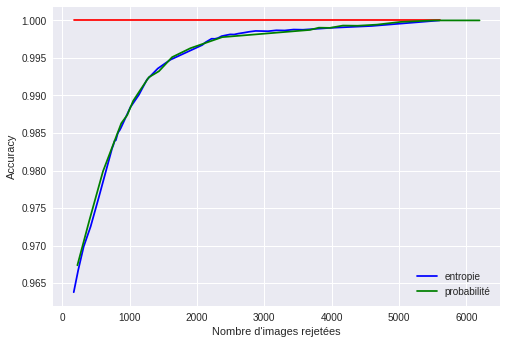

In [54]:
plt.plot(xe[9:55],ye[9:55],'b',label="entropie")
o=np.ones(len(xe[9:55]))
plt.plot(xe[9:55],o,'r')
plt.plot(xs[6:29],ys[6:29],'g',label="probabilité")
plt.xlabel("Nombre d'images rejetées")
plt.ylabel("Accuracy")
"""x=[]
y=[]
for point in points:
  x.append(point[0])
  y.append(point[1])
plt.plot(x,y,marker='o',color='k',label="rejecteur",ls='')"""
plt.legend()
plt.show()

In [0]:
"""from sklearn.metrics import auc
AUC=[]"""

In [0]:
AUC.append([seuil,auc(x,y)])

In [224]:
print(AUC)

[[0.45, 9683.174840300559], [0.5, 9539.615971823168], [0.3, 9738.753420148842], [0.35, 9697.03052071181], [0.38, 9712.074969287127], [0.42, 9691.097504047415], [0.4, 9679.464593491648], [0.25, 9678.365400639272], [0.2, 9597.347755256627], [0.32, 9693.286319181967]]


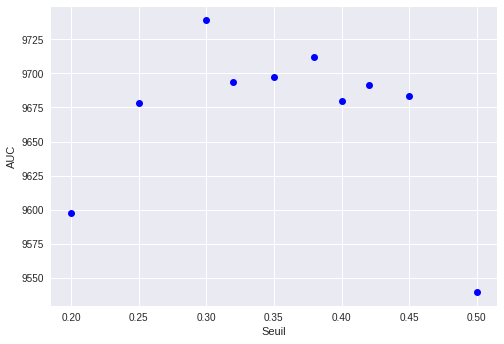

In [225]:
X=[]
Y=[]
for point in AUC:
  X.append(point[0])
  Y.append(point[1])
  
plt.xlabel("Seuil")
plt.ylabel("AUC")
plt.plot(X,Y,marker='o',color='b',ls='')
plt.show()

In [0]:
import pickle

with open("AUC_data", 'wb') as fichier:
  mon_pickler = pickle.Pickler(fichier)
  mon_pickler = pickle.dump(AUC,fichier)

In [228]:
!ls

10_classifier  AUC_data  datalab  Images_gan.csv


In [0]:
uploaded = drive.CreateFile({'title': 'AUC_data'})
uploaded.SetContentFile('AUC_data')uploaded = drive.CreateFile({'title': 'X_train.csv'})
uploaded.SetContentFile('X_train.csv')
uploaded.Upload()